# IF3170 Artificial Intelligence | Tugas Besar 2

This notebook serves as a template for the assignment. Please create a copy of this notebook to complete your work. You can add more code blocks, markdown blocks, or new sections if needed.

Group Members:
1. Wijaksara Aptaluhung (18223088)
2. Inggried Amelia Deswanty (18223935)
3. Persada Ramiiza Abyudaya (18223033)
4. Wisa Ahmaduta Dinutama (18223003)

## Import Libraries

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import time
import warnings

from collections import Counter
from sklearn.impute import KNNImputer as SklearnKNNImputer
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from logistic_regression import LogisticRegression

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
np.random.seed(42)
warnings.filterwarnings("ignore", category=FutureWarning)
plt.style.use('ggplot')

print("Libraries imported successfully!")

Libraries imported successfully!


## Import Dataset

In [41]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

train_ids = train['ID'].values
test_ids = test['ID'].values

y_train = train['is_fraud'].values

print(f"Train shape: {train.shape}")
print(f"Test shape: {test.shape}")

Train shape: (100000, 31)
Test shape: (100000, 30)


In [42]:
print("Train shape:", train.shape)
train.head()

Train shape: (100000, 31)


,ID,transaction_id,user_id,age,gender,country,device_type,device_os,merchant_category,transaction_amount,transaction_type,time_of_day,day_of_week,transaction_duration,num_prev_transactions,avg_transaction_amount,std_transaction_amount,transactions_last_24h,transactions_last_1h,failed_login_attempts,ip_risk_score,device_trust_score,account_age_days,has_chargeback_history,shared_ip_users,shared_device_users,merchant_risk,country_risk,distance_from_home,is_new_country,is_fraud
0,0,T0065716,15307,35,M,UK,mobile,Android,clothing,17.70,purchase,18,1,3.04,34,91.01,56.68,0,0,1,0.464,0.793,1056,0,1,1,0.10,0.04,9.66,0,1
1,1,T0027857,1226,54,F,IN,mobile,Android,restaurants,NaN,purchase,7,3,0.33,28,NaN,50.11,1,0,0,0.997,NaN,1867,0,1,1,0.12,0.10,12.05,0,1
2,2,T0055953,16072,35,M,US,desktop,iOS,restaurants,5.20,purchase,15,5,7.85,31,111.05,20.79,3,0,0,0.940,0.281,1726,1,2,2,0.12,0.05,181.28,0,0
3,3,T0083660,725,23,F,US,mobile,Android,electronics,180.70,purchase,18,3,4.71,32,27.88,73.32,3,0,0,0.166,0.061,30,1,1,1,0.30,0.05,33.26,0,0
4,4,T0017674,7367,32,M,UK,mobile,Android,gas,35.45,purchase,8,3,1.56,21,81.34,73.28,0,0,0,0.870,0.592,1386,0,3,1,0.05,0.04,174.83,0,0


In [43]:
print("Test shape:", test.shape)
test.head()

Test shape: (100000, 30)


,ID,transaction_id,user_id,age,gender,country,device_type,device_os,merchant_category,transaction_amount,transaction_type,time_of_day,day_of_week,transaction_duration,num_prev_transactions,avg_transaction_amount,std_transaction_amount,transactions_last_24h,transactions_last_1h,failed_login_attempts,ip_risk_score,device_trust_score,account_age_days,has_chargeback_history,shared_ip_users,shared_device_users,merchant_risk,country_risk,distance_from_home,is_new_country
0,0,T0065716,1199,58,M,UK,tablet,Android,gas,3.54,topup,6,0,4.03,42,102.55,55.15,2,0,0,0.906,0.595,2305,0,3,3,0.05,0.04,13.55,0
1,1,T0027857,29841,71,M,BR,desktop,Android,groceries,94.80,transfer,17,0,15.68,20,40.50,70.61,2,0,0,0.917,0.553,2911,0,3,3,0.05,0.13,6.09,0
2,2,T0055953,25403,76,F,CA,tablet,iOS,restaurants,84.45,transfer,18,0,0.13,32,80.61,77.97,2,1,0,0.675,0.614,2952,0,1,1,0.12,0.03,118.59,0
3,3,T0083660,27600,70,F,UK,mobile,iOS,gas,23.66,topup,20,4,3.75,34,7.48,19.61,4,0,0,0.541,0.493,2539,0,2,2,0.05,0.04,255.86,0
4,4,T0017674,21543,70,F,US,mobile,Windows,travel,81.45,transfer,18,2,6.55,32,88.94,54.31,1,1,0,0.832,0.183,1017,0,1,2,0.35,0.05,16.19,0


# Exploratory Data Analysis (Optional)

Exploratory Data Analysis (EDA) is a crucial step in the data analysis process that involves examining and visualizing data sets to uncover patterns, trends, anomalies, and insights. It is the first step before applying more advanced statistical and machine learning techniques. EDA helps you to gain a deep understanding of the data you are working with, allowing you to make informed decisions and formulate hypotheses for further analysis.

### Data Understanding
The purpose of this section is to help participants understand the quality and initial characteristics of the provided data. This is a core part of Exploratory Data Analysis (EDA), which aims to assess the structure and completeness of the data, identify patterns, anomalies, and potential issues, understand relationships between variables, and determine the appropriate next steps for preprocessing or modeling.


### PART 1:
1. The dataset size shows how many rows and columns you have, helping you understand the amount of data.
2. The data types show how each feature should be handled, such as numbers or categories.
3. The count of unique values in categorical features shows how many different categories there are.
4. The basic statistics for numerical features show the range and spread of the data, helping you spot patterns or outliers.

##### 1.1. Data Size

In [44]:
size = train.shape
print(f"Data Size: {size[0]} instances, {size[1]} features")

Data Size: 100000 instances, 31 features


##### 1.2 Data Type & Information

In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ID                      100000 non-null  int64  
 1   transaction_id          100000 non-null  object 
 2   user_id                 100000 non-null  int64  
 3   age                     100000 non-null  int64  
 4   gender                  100000 non-null  object 
 5   country                 100000 non-null  object 
 6   device_type             100000 non-null  object 
 7   device_os               100000 non-null  object 
 8   merchant_category       100000 non-null  object 
 9   transaction_amount      97581 non-null   float64
 10  transaction_type        100000 non-null  object 
 11  time_of_day             100000 non-null  int64  
 12  day_of_week             100000 non-null  int64  
 13  transaction_duration    100000 non-null  float64
 14  num_prev_transactions

In [46]:
train.describe()

,ID,user_id,age,transaction_amount,time_of_day,day_of_week,transaction_duration,num_prev_transactions,avg_transaction_amount,std_transaction_amount,transactions_last_24h,transactions_last_1h,failed_login_attempts,ip_risk_score,device_trust_score,account_age_days,has_chargeback_history,shared_ip_users,shared_device_users,merchant_risk,country_risk,distance_from_home,is_new_country,is_fraud
count,100000.000000,100000.000000,100000.000000,97581.000000,100000.000000,100000.000000,100000.000000,100000.00000,97581.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,97581.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,49999.500000,15040.173180,48.484150,126.855288,12.770160,2.780700,3.999587,29.99208,69.969722,42.541209,2.040150,0.30923,0.298110,0.500395,0.499480,1497.325540,0.060270,2.000770,1.499800,0.192980,0.071324,117.411584,0.049580,0.141280
std,28867.657797,8655.074007,17.892168,376.035544,5.748626,2.064754,4.012831,5.48621,29.961530,21.652791,3.967414,1.46423,0.546208,0.288944,0.288812,866.004305,0.237988,1.414676,1.225885,0.134019,0.033203,212.016312,0.217077,0.348312
min,0.000000,1.000000,18.000000,0.010000,0.000000,0.000000,0.000000,8.00000,-52.890000,5.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.050000,0.020000,0.000000,0.000000,0.000000
25%,24999.750000,7549.000000,33.000000,26.910000,8.000000,1.000000,1.150000,26.00000,49.780000,23.860000,1.000000,0.00000,0.000000,0.250000,0.249000,745.000000,0.000000,1.000000,1.000000,0.080000,0.040000,29.620000,0.000000,0.000000
50%,49999.500000,15093.000000,48.000000,64.460000,12.000000,3.000000,2.760000,30.00000,69.990000,42.480000,1.000000,0.00000,0.000000,0.501000,0.499000,1496.000000,0.000000,2.000000,1.000000,0.120000,0.050000,71.810000,0.000000,0.000000
75%,74999.250000,22541.000000,64.000000,131.060000,18.000000,5.000000,5.540000,34.00000,90.250000,61.310000,2.000000,0.00000,1.000000,0.751000,0.750000,2244.000000,0.000000,3.000000,2.000000,0.300000,0.100000,144.440000,0.000000,0.000000
max,99999.000000,29999.000000,79.000000,20601.133350,23.000000,6.000000,52.070000,59.00000,195.790000,80.000000,44.000000,15.00000,5.000000,1.000000,1.000000,2999.000000,1.000000,11.000000,11.000000,0.550000,0.130000,6388.517628,1.000000,1.000000


##### 1.2.1. Categorical Features

In [47]:
exclude = {'NoOfURLRedirect', 'NoOfSelfRedirect', 'FILENAME', 'URL', 'Domain', 'Title', 'transaction_id'}

num_cols = train.select_dtypes(include=[np.number]).columns
binary_like = [c for c in num_cols if set(train[c].dropna().unique()).issubset({0, 1})]

cat_cols = train.select_dtypes(include=['object', 'category']).columns.tolist()

all_categorical = [c for c in (binary_like + cat_cols) if c in train.columns and c not in exclude]

for special in ('label', 'attack_cat'):
    if special in train.columns and special not in all_categorical:
        all_categorical.append(special)

unique_values2 = (
    train[all_categorical]
    .nunique(dropna=True)
    .rename_axis('Feature')
    .reset_index(name='Unique Value')
)
unique_values2.index = pd.RangeIndex(start=1, stop=len(unique_values2) + 1)

print('Detected binary-like numeric columns:', binary_like)
print('Categorical features considered (after exclusion):', all_categorical)
print('\nNumber of Unique Values for Categorical Features:')
unique_values2

Detected binary-like numeric columns: ['has_chargeback_history', 'is_new_country', 'is_fraud']
Categorical features considered (after exclusion): ['has_chargeback_history', 'is_new_country', 'is_fraud', 'gender', 'country', 'device_type', 'device_os', 'merchant_category', 'transaction_type']

Number of Unique Values for Categorical Features:


,Feature,Unique Value
1,has_chargeback_history,2
2,is_new_country,2
3,is_fraud,2
4,gender,2
5,country,10
6,device_type,3
7,device_os,5
8,merchant_category,9
9,transaction_type,4


##### 1.2.2. Numerical Features

In [48]:
num_cols = train.select_dtypes(include=[np.number]).columns.tolist()

exclude_cols = [c for c in ['NoOfURLRedirect', 'NoOfSelfRedirect', 'FILENAME', 'URL', 'Domain', 'Title', 'id', 'ID'] if c in train.columns]
for t in ['label', 'attack_cat']:
    if t in train.columns and t not in exclude_cols:
        exclude_cols.append(t)

numerical_features = [c for c in num_cols if c not in set(binary_like) and c not in set(exclude_cols)]

if len(numerical_features) == 0:
    print('Warning: no numeric features found after exclusions — falling back to all numeric columns.')
    numerical_features = num_cols

unique_num = train[numerical_features].nunique(dropna=True)
unique_num_df = pd.DataFrame(unique_num, columns=['Unique Values']).reset_index()
unique_num_df.rename(columns={'index': 'Feature'}, inplace=True)
unique_num_df.index = pd.RangeIndex(1, len(unique_num_df) + 1)

print('Numeric columns considered (after exclusions):')
print(numerical_features)

unique_num_df

Numeric columns considered (after exclusions):
['user_id', 'age', 'transaction_amount', 'time_of_day', 'day_of_week', 'transaction_duration', 'num_prev_transactions', 'avg_transaction_amount', 'std_transaction_amount', 'transactions_last_24h', 'transactions_last_1h', 'failed_login_attempts', 'ip_risk_score', 'device_trust_score', 'account_age_days', 'shared_ip_users', 'shared_device_users', 'merchant_risk', 'country_risk', 'distance_from_home']


,Feature,Unique Values
1,user_id,28918
2,age,62
3,transaction_amount,28920
4,time_of_day,24
5,day_of_week,7
6,transaction_duration,2448
7,num_prev_transactions,49
8,avg_transaction_amount,14709
9,std_transaction_amount,7501
10,transactions_last_24h,45


#### 1.3. Descriptive Statistics

In [49]:
summary_stats = train[numerical_features].describe().transpose()
summary_stats = summary_stats[['min', 'max', 'mean', '50%', 'std']]
summary_stats.rename(columns={'50%': 'median'}, inplace=True)
summary_stats.index = range(1, len(summary_stats) + 1)

print("Summary Statistics for Numerical Features:")
summary_stats

Summary Statistics for Numerical Features:


,min,max,mean,median,std
1,1.00,29999.000000,15040.173180,15093.000,8655.074007
2,18.00,79.000000,48.484150,48.000,17.892168
3,0.01,20601.133350,126.855288,64.460,376.035544
4,0.00,23.000000,12.770160,12.000,5.748626
5,0.00,6.000000,2.780700,3.000,2.064754
6,0.00,52.070000,3.999587,2.760,4.012831
7,8.00,59.000000,29.992080,30.000,5.486210
8,-52.89,195.790000,69.969722,69.990,29.961530
9,5.00,80.000000,42.541209,42.480,21.652791
10,0.00,44.000000,2.040150,1.000,3.967414


### PART 2:
1. Identify how many missing or empty values each feature has.
2. Detect any unusual or extreme values in each feature.

##### 2.1 Missing Values

In [50]:
missing_count = train.isna().sum().sort_values(ascending=False)
missing_pct = train.isna().mean().sort_values(ascending=False) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing %': missing_pct.round(2)
})
missing_df = missing_df[missing_df['Missing Count'] > 0]

print("Missing Values Summary:")
print(missing_df)

Missing Values Summary:
                        Missing Count  Missing %
transaction_amount               2419       2.42
device_trust_score               2419       2.42
avg_transaction_amount           2419       2.42


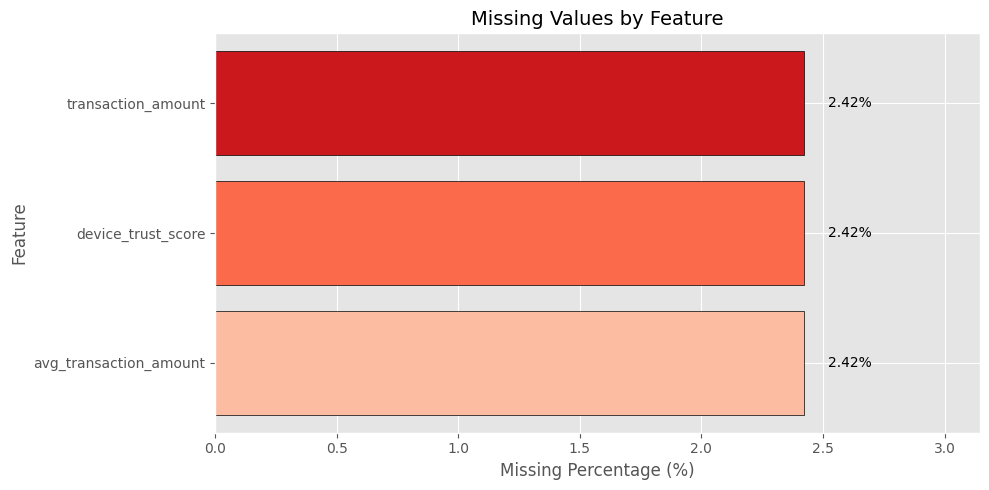


Total features with missing values: 3
Total missing entries: 7,257


In [51]:
if len(missing_df) > 0:
    plt.figure(figsize=(10, 5))
    colors = sns.color_palette("Reds_r", len(missing_df))
    bars = plt.barh(missing_df.index, missing_df['Missing %'], color=colors, edgecolor='black')
    
    for bar, pct in zip(bars, missing_df['Missing %']):
        plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2, 
                 f'{pct:.2f}%', va='center', fontsize=10)
    
    plt.xlabel('Missing Percentage (%)', fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    plt.title('Missing Values by Feature', fontsize=14)
    plt.xlim(0, max(missing_df['Missing %']) * 1.3)
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
    
    print(f"\nTotal features with missing values: {len(missing_df)}")
    print(f"Total missing entries: {missing_df['Missing Count'].sum():,}")
else:
    print("No missing values found in the dataset!")

##### 2.2 Outliers

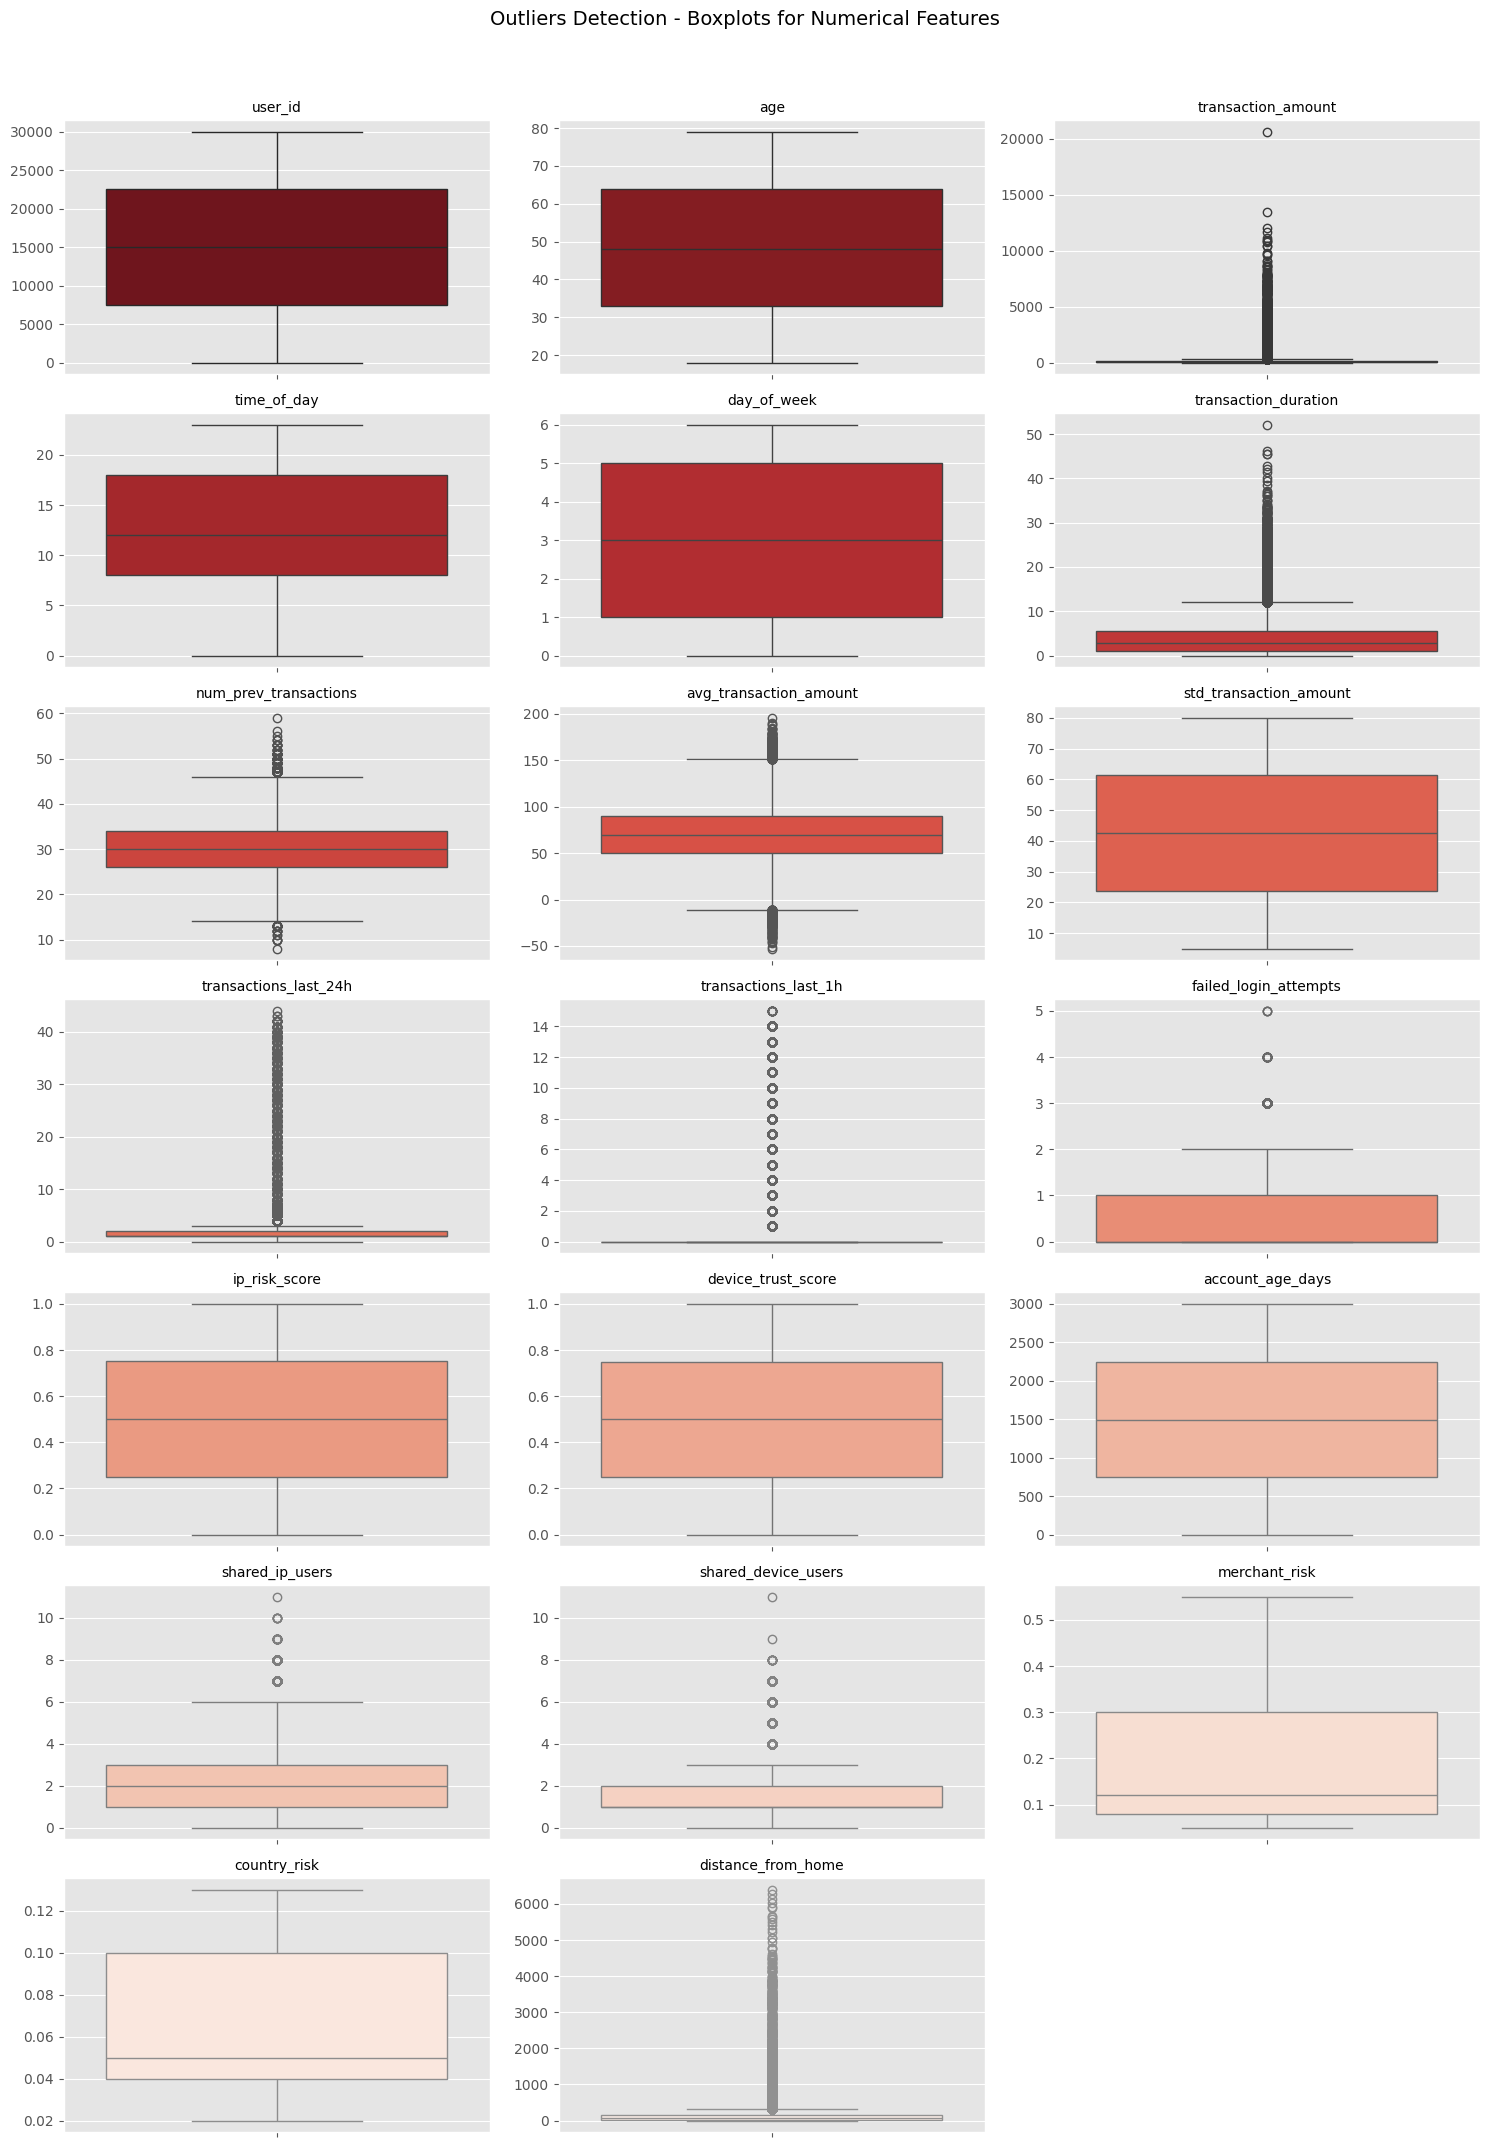

In [52]:
def plot_outliers(dataframe, n_cols=3, subplot_size=(5, 3)):
    numerical_cols = dataframe.columns
    n_rows = (len(numerical_cols) + n_cols - 1) // n_cols
    colors = sns.color_palette("Reds_r", len(numerical_cols))
    
    plt.figure(figsize=(subplot_size[0] * n_cols, subplot_size[1] * n_rows))
    for i, col in enumerate(numerical_cols):
        plt.subplot(n_rows, n_cols, i + 1)
        sns.boxplot(y=dataframe[col], color=colors[i])
        plt.title(f'{col}', fontsize=10)
        plt.ylabel('')
    plt.suptitle('Outliers Detection - Boxplots for Numerical Features', fontsize=14, y=1.02)
    plt.tight_layout()
    plt.show()

plot_outliers(train[numerical_features])

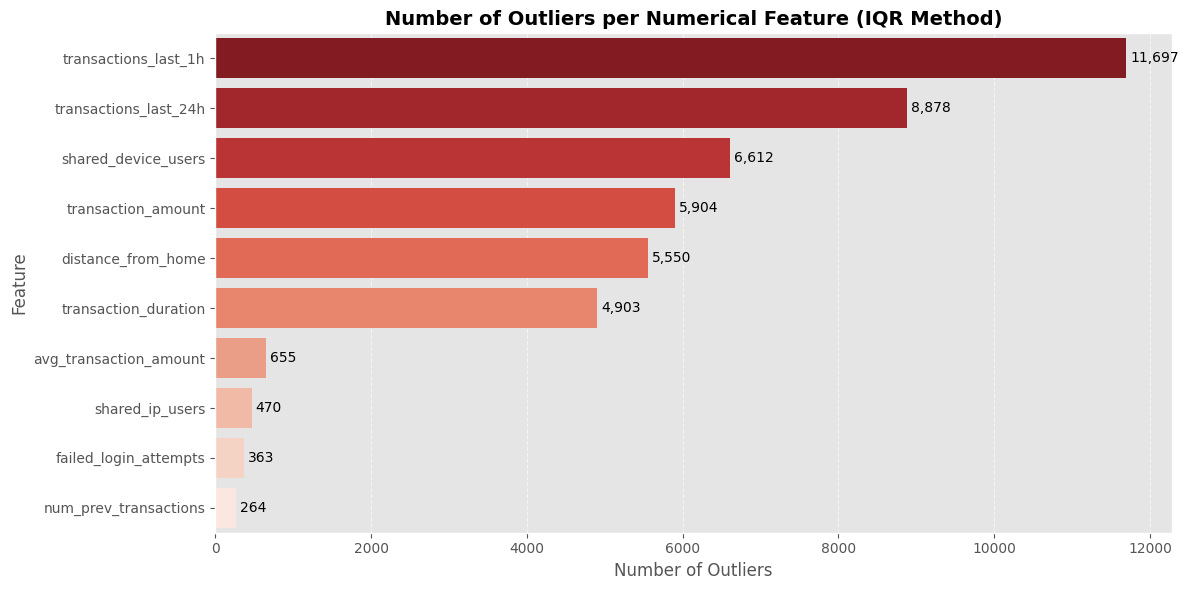


Total features with outliers: 10
Total outlier entries: 45,296


,Feature,Outliers
10,transactions_last_1h,11697
9,transactions_last_24h,8878
16,shared_device_users,6612
2,transaction_amount,5904
19,distance_from_home,5550
5,transaction_duration,4903
7,avg_transaction_amount,655
15,shared_ip_users,470
11,failed_login_attempts,363
6,num_prev_transactions,264


In [53]:
def count_and_visualize_numerical_outliers(data_numerical):
    outlier_counts = {}
    for column in data_numerical.columns:
        Q1 = data_numerical[column].quantile(0.25)
        Q3 = data_numerical[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data_numerical[(data_numerical[column] < lower_bound) | (data_numerical[column] > upper_bound)]
        outlier_counts[column] = outliers.shape[0]
    
    outlier_df = pd.DataFrame(list(outlier_counts.items()), columns=["Feature", "Outliers"])
    outlier_df = outlier_df.sort_values(by="Outliers", ascending=False)
    outlier_df = outlier_df[outlier_df["Outliers"] > 0]
    
    if len(outlier_df) > 0:
        plt.figure(figsize=(12, max(6, len(outlier_df) * 0.4)))
        sns.barplot(x="Outliers", y="Feature", data=outlier_df, palette="Reds_r")
        
        for index, value in enumerate(outlier_df["Outliers"]):
            plt.text(value + 50, index, f'{value:,}', va='center', fontsize=10)
        
        plt.title("Number of Outliers per Numerical Feature (IQR Method)", fontsize=14, weight='bold')
        plt.xlabel("Number of Outliers", fontsize=12)
        plt.ylabel("Feature", fontsize=12)
        plt.grid(axis='x', linestyle='--', alpha=0.6)
        plt.tight_layout()
        plt.show()
        
        total_outliers = outlier_df['Outliers'].sum()
        print(f"\nTotal features with outliers: {len(outlier_df)}")
        print(f"Total outlier entries: {total_outliers:,}")
    else:
        print("No outliers found in the dataset!")
    
    return outlier_df

outlier_df = count_and_visualize_numerical_outliers(train[numerical_features])
outlier_df

### PART 3:
1. Determine how strongly different features are related to one another.
2. Create visual plots that show how each feature is distributed, whether it is categorical or numerical.
3. Create visualizations that show how each feature relates to the target variable.
4. Skewness analysis to measure the asymmetry of a distribution


#### 3.1. Correlations Betweenn Features

##### 3.1.1. Numerical Features Correlatiosn

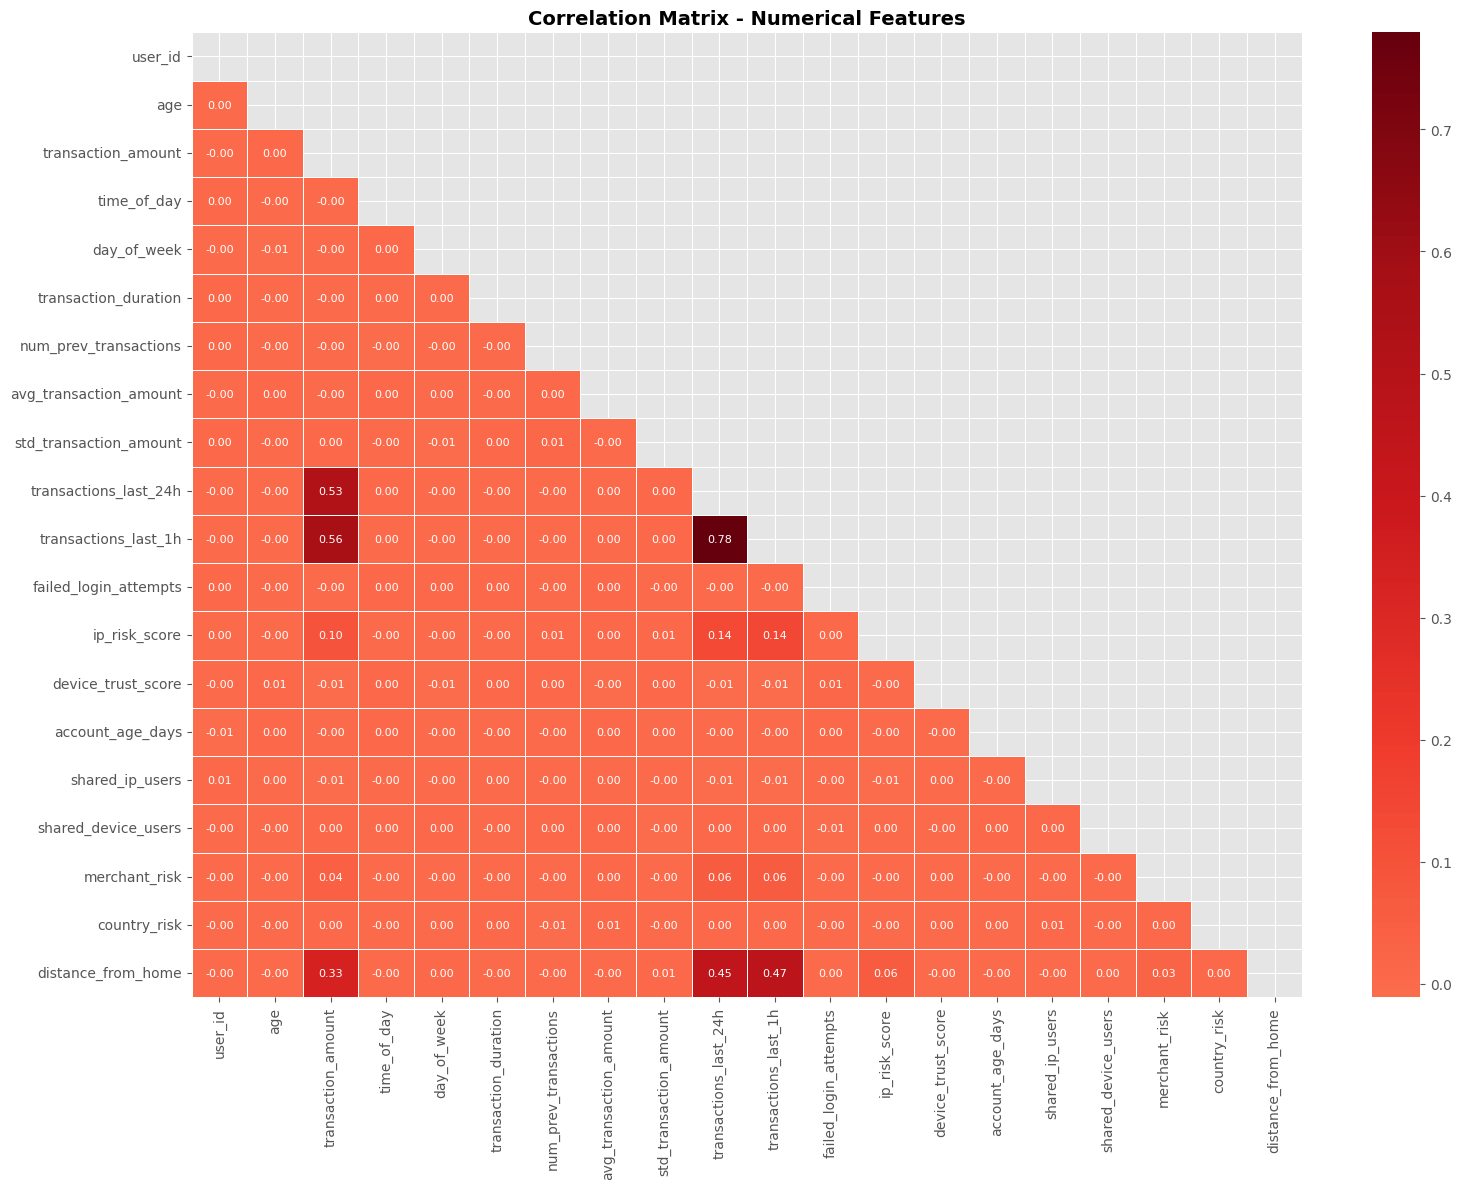


Top 10 Positive Correlations:
transactions_last_24h  transactions_last_1h     0.779558
transactions_last_1h   transactions_last_24h    0.779558
transaction_amount     transactions_last_1h     0.563724
transactions_last_1h   transaction_amount       0.563724
transactions_last_24h  transaction_amount       0.526270
transaction_amount     transactions_last_24h    0.526270
distance_from_home     transactions_last_1h     0.468482
transactions_last_1h   distance_from_home       0.468482
distance_from_home     transactions_last_24h    0.446735
transactions_last_24h  distance_from_home       0.446735
dtype: float64

Top 10 Negative Correlations:
transactions_last_1h   device_trust_score      -0.007086
device_trust_score     transactions_last_1h    -0.007086
shared_ip_users        transactions_last_1h    -0.008645
transactions_last_1h   shared_ip_users         -0.008645
transactions_last_24h  device_trust_score      -0.008680
device_trust_score     transactions_last_24h   -0.008680
account_age

In [54]:
plt.figure(figsize=(16, 12))
corr_matrix = train[numerical_features].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', 
            cmap='Reds', center=0, linewidths=0.5,
            annot_kws={'size': 8})
plt.title('Correlation Matrix - Numerical Features', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

corr_pairs = corr_matrix.unstack().sort_values(ascending=False)
corr_pairs = corr_pairs[corr_pairs < 1]
print("\nTop 10 Positive Correlations:")
print(corr_pairs.head(10))
print("\nTop 10 Negative Correlations:")
print(corr_pairs.tail(10))

#### 3.2. Distribution of Features

##### 3.2.1. Numerical Features Distribution

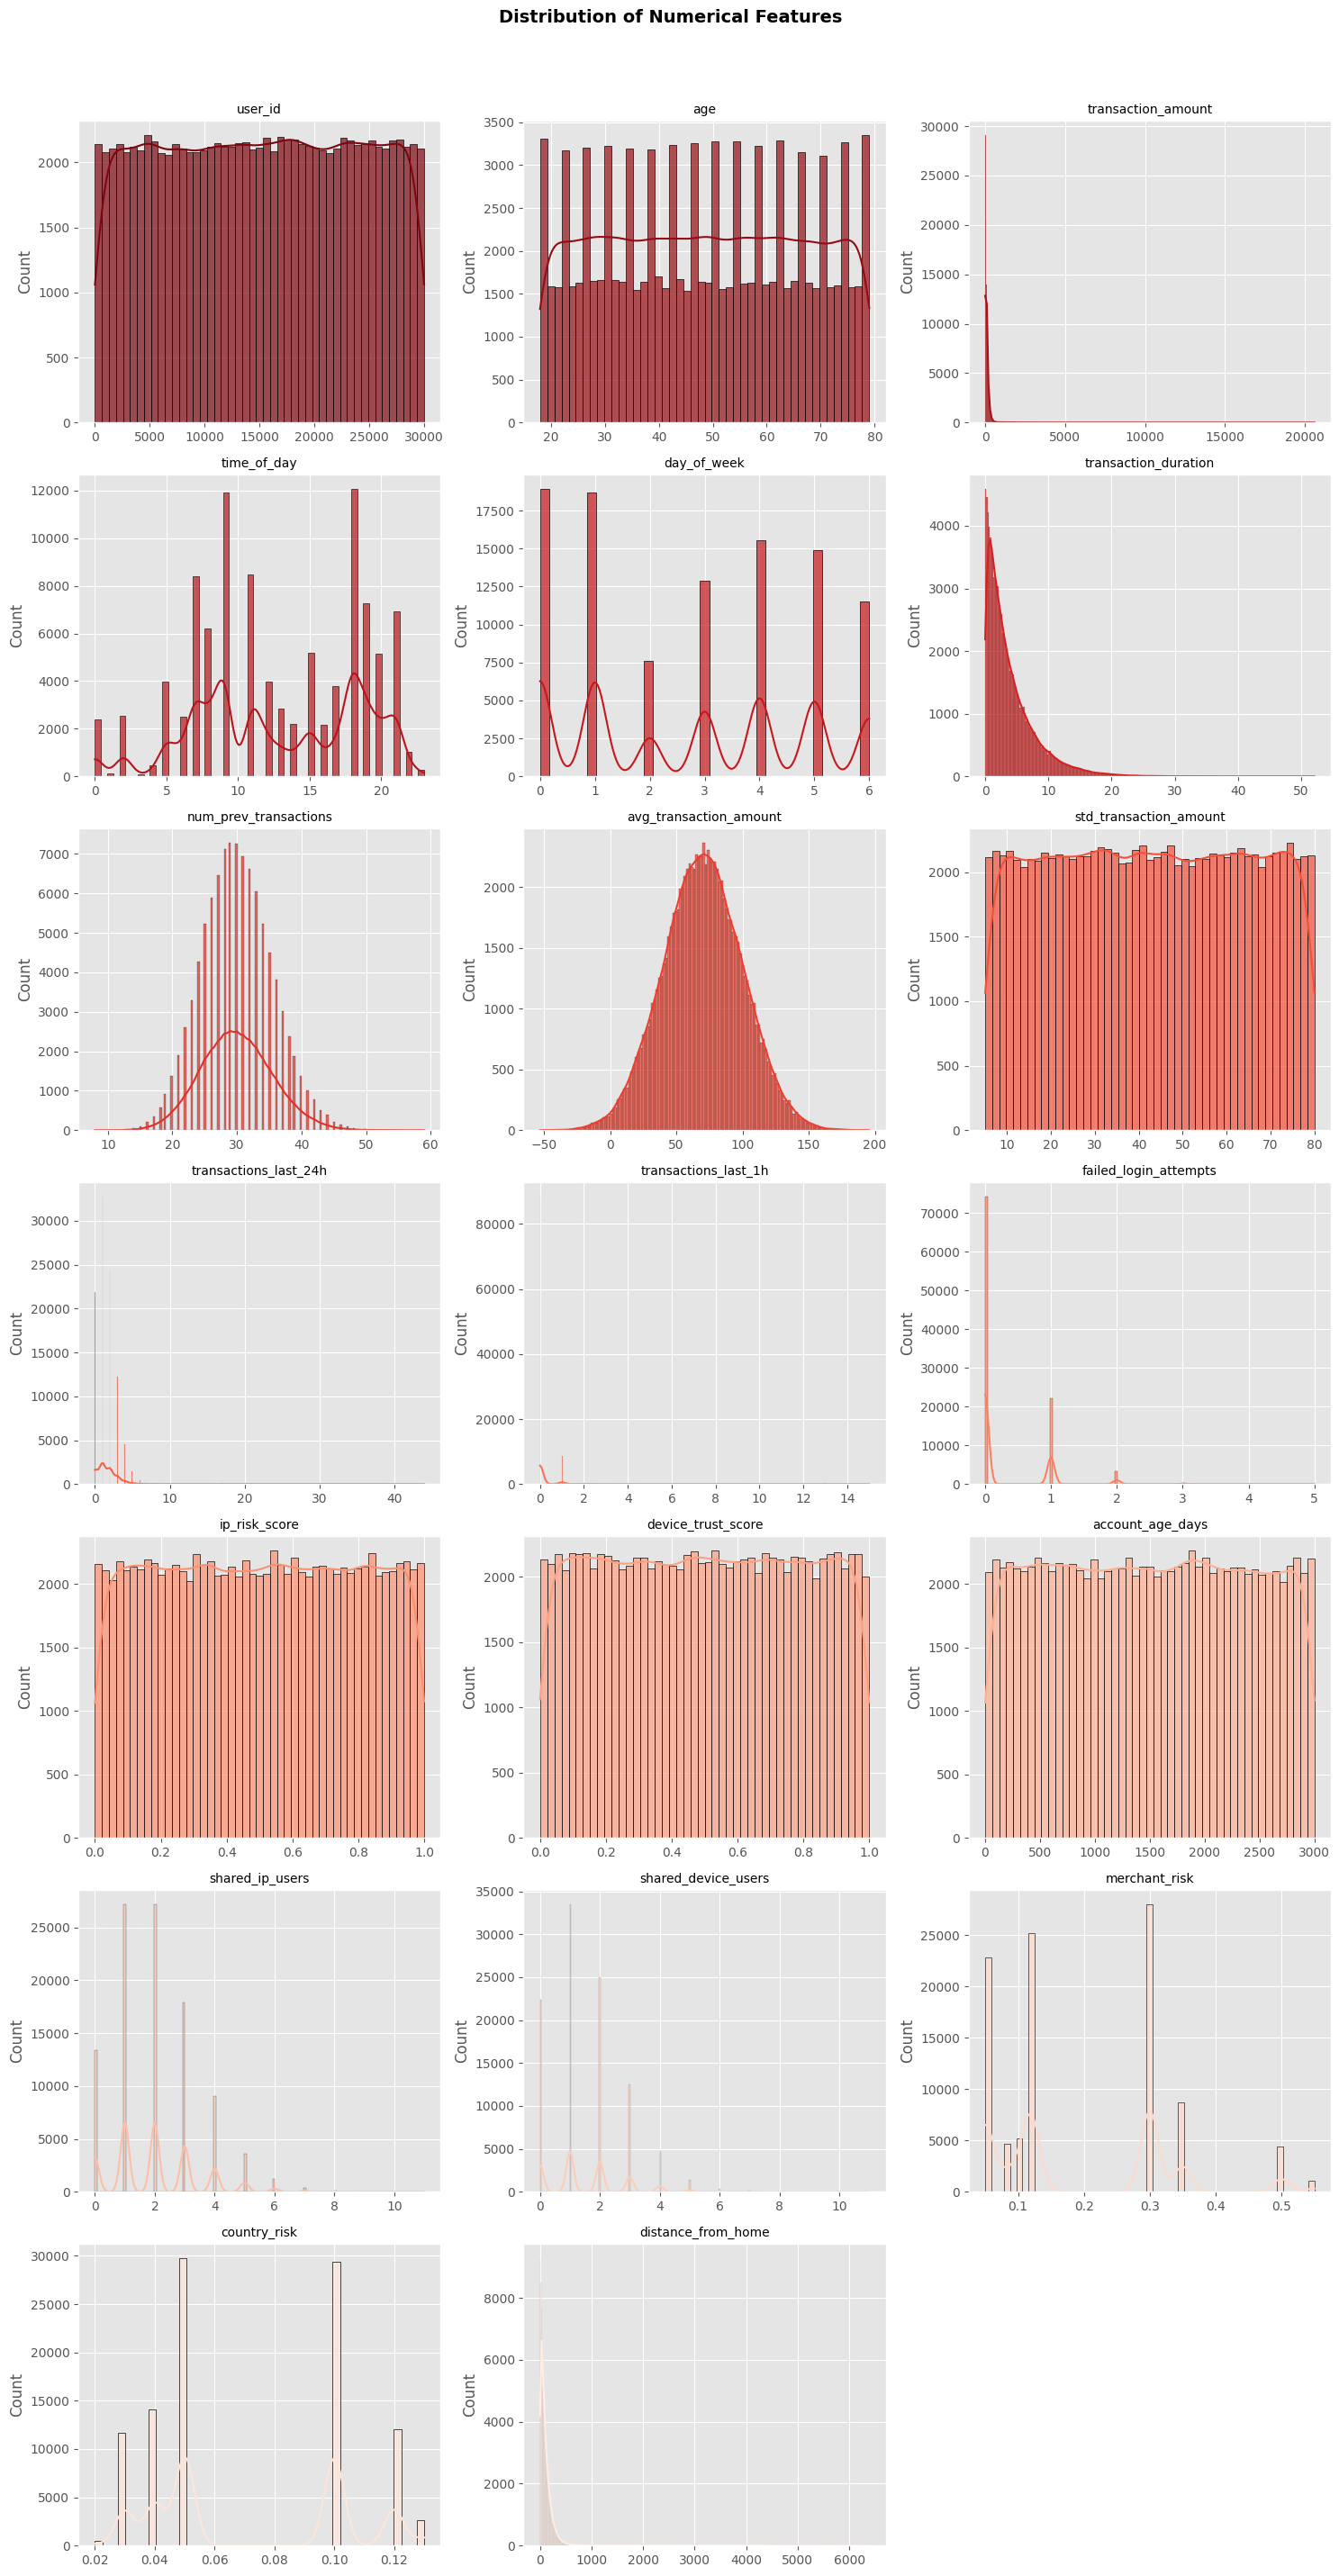

In [55]:
def plot_numerical_distributions(dataframe, n_cols=3, subplot_size=(5, 4)):
    numerical_cols = dataframe.columns
    n_rows = (len(numerical_cols) + n_cols - 1) // n_cols
    colors = sns.color_palette("Reds_r", len(numerical_cols))
    
    plt.figure(figsize=(subplot_size[0] * n_cols, subplot_size[1] * n_rows))
    for i, col in enumerate(numerical_cols):
        plt.subplot(n_rows, n_cols, i + 1)
        sns.histplot(dataframe[col], kde=True, color=colors[i], edgecolor='black', alpha=0.7)
        plt.title(f'{col}', fontsize=10)
        plt.xlabel('')
    plt.suptitle('Distribution of Numerical Features', fontsize=14, y=1.02, weight='bold')
    plt.tight_layout()
    plt.show()

plot_numerical_distributions(train[numerical_features])

##### 3.2.2. Categorical Features Distribution

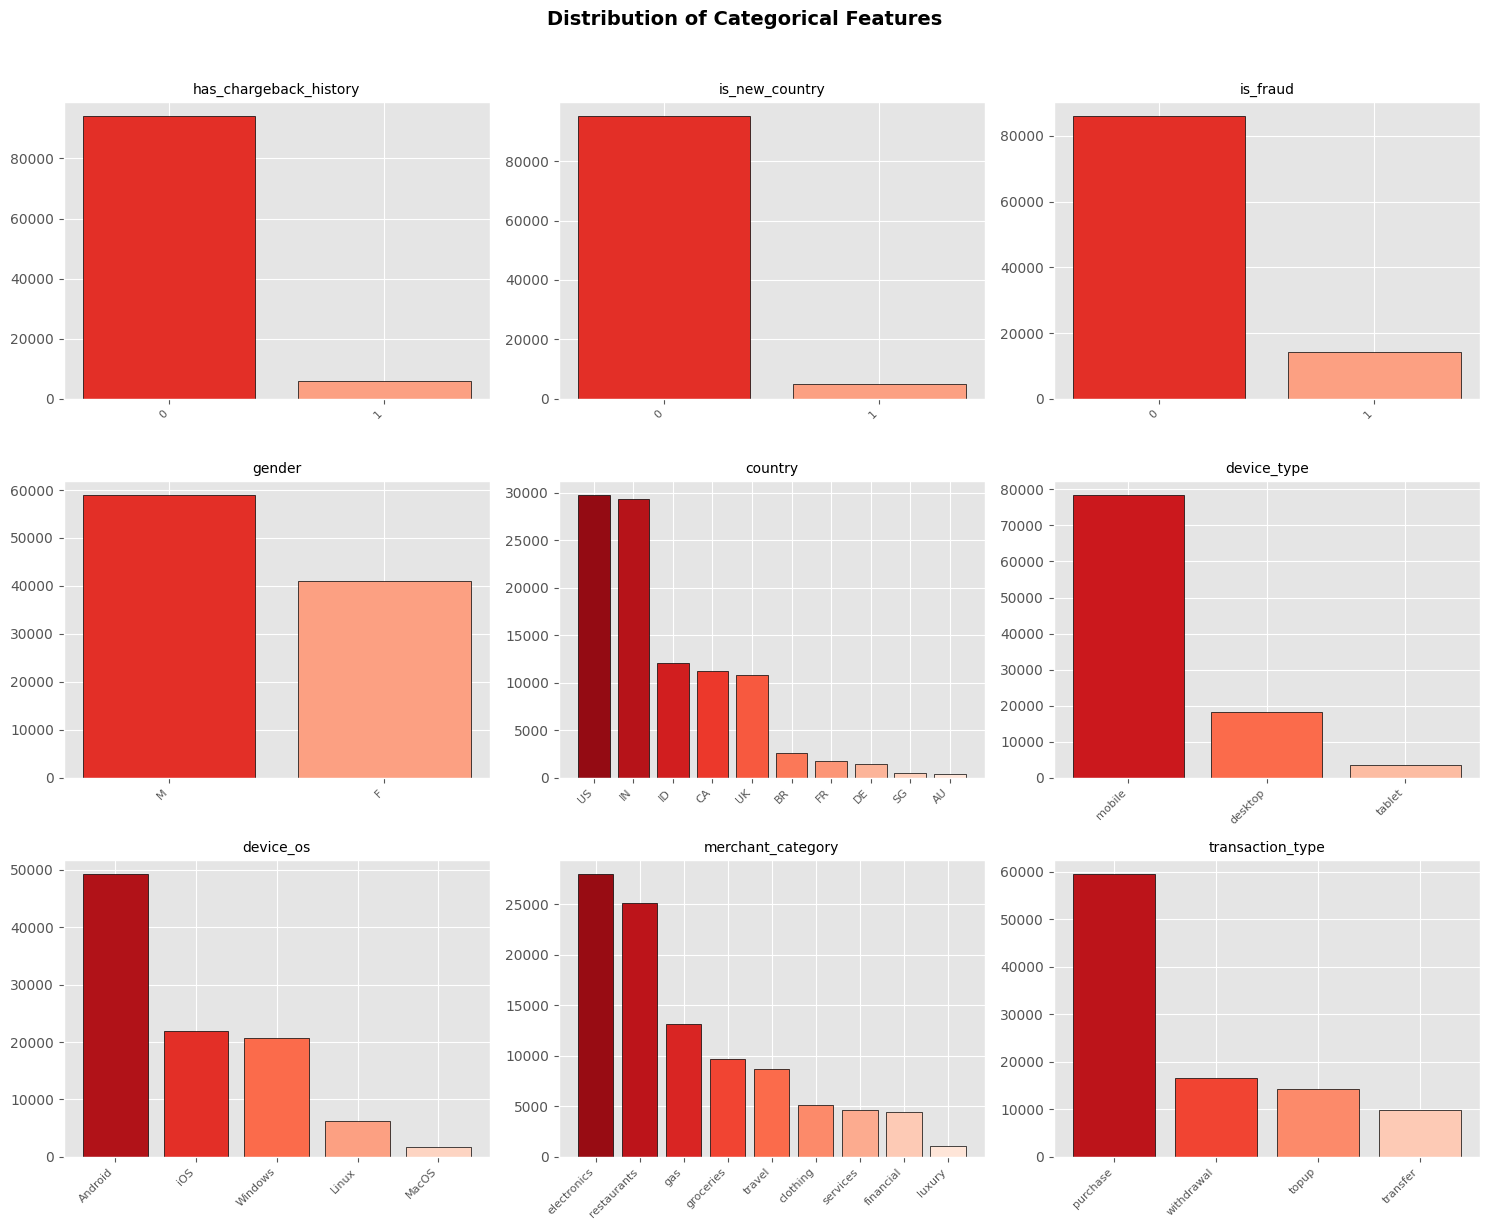

In [56]:
def plot_categorical_distributions(dataframe, cat_features, n_cols=3, subplot_size=(5, 4), top_n=10):
    n_rows = (len(cat_features) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(subplot_size[0] * n_cols, subplot_size[1] * n_rows))
    axes = axes.flatten() if n_rows * n_cols > 1 else [axes]
    
    for i, col in enumerate(cat_features):
        ax = axes[i]
        value_counts = dataframe[col].value_counts().head(top_n)
        colors = sns.color_palette("Reds_r", len(value_counts))
        ax.bar(range(len(value_counts)), value_counts.values, color=colors, edgecolor='black')
        ax.set_xticks(range(len(value_counts)))
        ax.set_xticklabels(value_counts.index, rotation=45, ha='right', fontsize=8)
        ax.set_title(f'{col}', fontsize=10)
        ax.set_xlabel('')
        
        total_unique = dataframe[col].nunique()
        if total_unique > top_n:
            ax.set_xlabel(f'(showing top {top_n} of {total_unique})', fontsize=8)
    
    for j in range(len(cat_features), len(axes)):
        axes[j].set_visible(False)
    
    plt.suptitle('Distribution of Categorical Features', fontsize=14, y=1.02, weight='bold')
    plt.tight_layout()
    plt.show()

plot_categorical_distributions(train, all_categorical)

#### 3.3. Target Variable Distribution

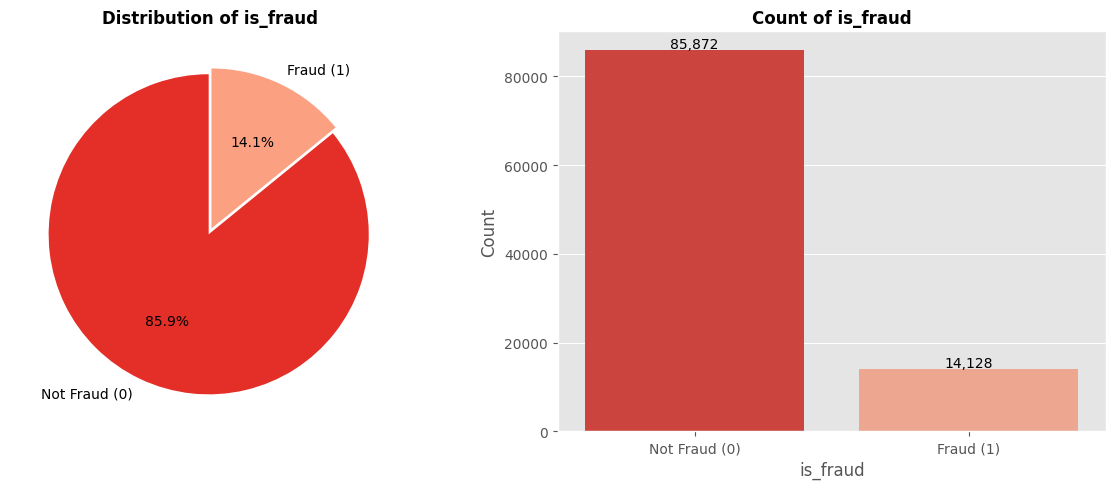


Class Distribution:
is_fraud
0    85872
1    14128
Name: count, dtype: int64

Imbalance Ratio: 6.08:1


In [57]:
target_col = 'is_fraud'

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
target_counts = train[target_col].value_counts()
colors = sns.color_palette("Reds_r", len(target_counts))
plt.pie(target_counts, labels=['Not Fraud (0)', 'Fraud (1)'], autopct='%1.1f%%', colors=colors, 
        explode=[0.02]*len(target_counts), startangle=90)
plt.title(f'Distribution of {target_col}', fontsize=12, weight='bold')

plt.subplot(1, 2, 2)
sns.barplot(x=target_counts.index, y=target_counts.values, palette="Reds_r")
for i, v in enumerate(target_counts.values):
    plt.text(i, v + 500, f'{v:,}', ha='center', fontsize=10)
plt.title(f'Count of {target_col}', fontsize=12, weight='bold')
plt.xlabel(target_col)
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Fraud (0)', 'Fraud (1)'])

plt.tight_layout()
plt.show()

print(f"\nClass Distribution:")
print(target_counts)
print(f"\nImbalance Ratio: {target_counts.max() / target_counts.min():.2f}:1")

#### 3.4. Features vs Target

##### 3.4.1. Numerical Features vs Target

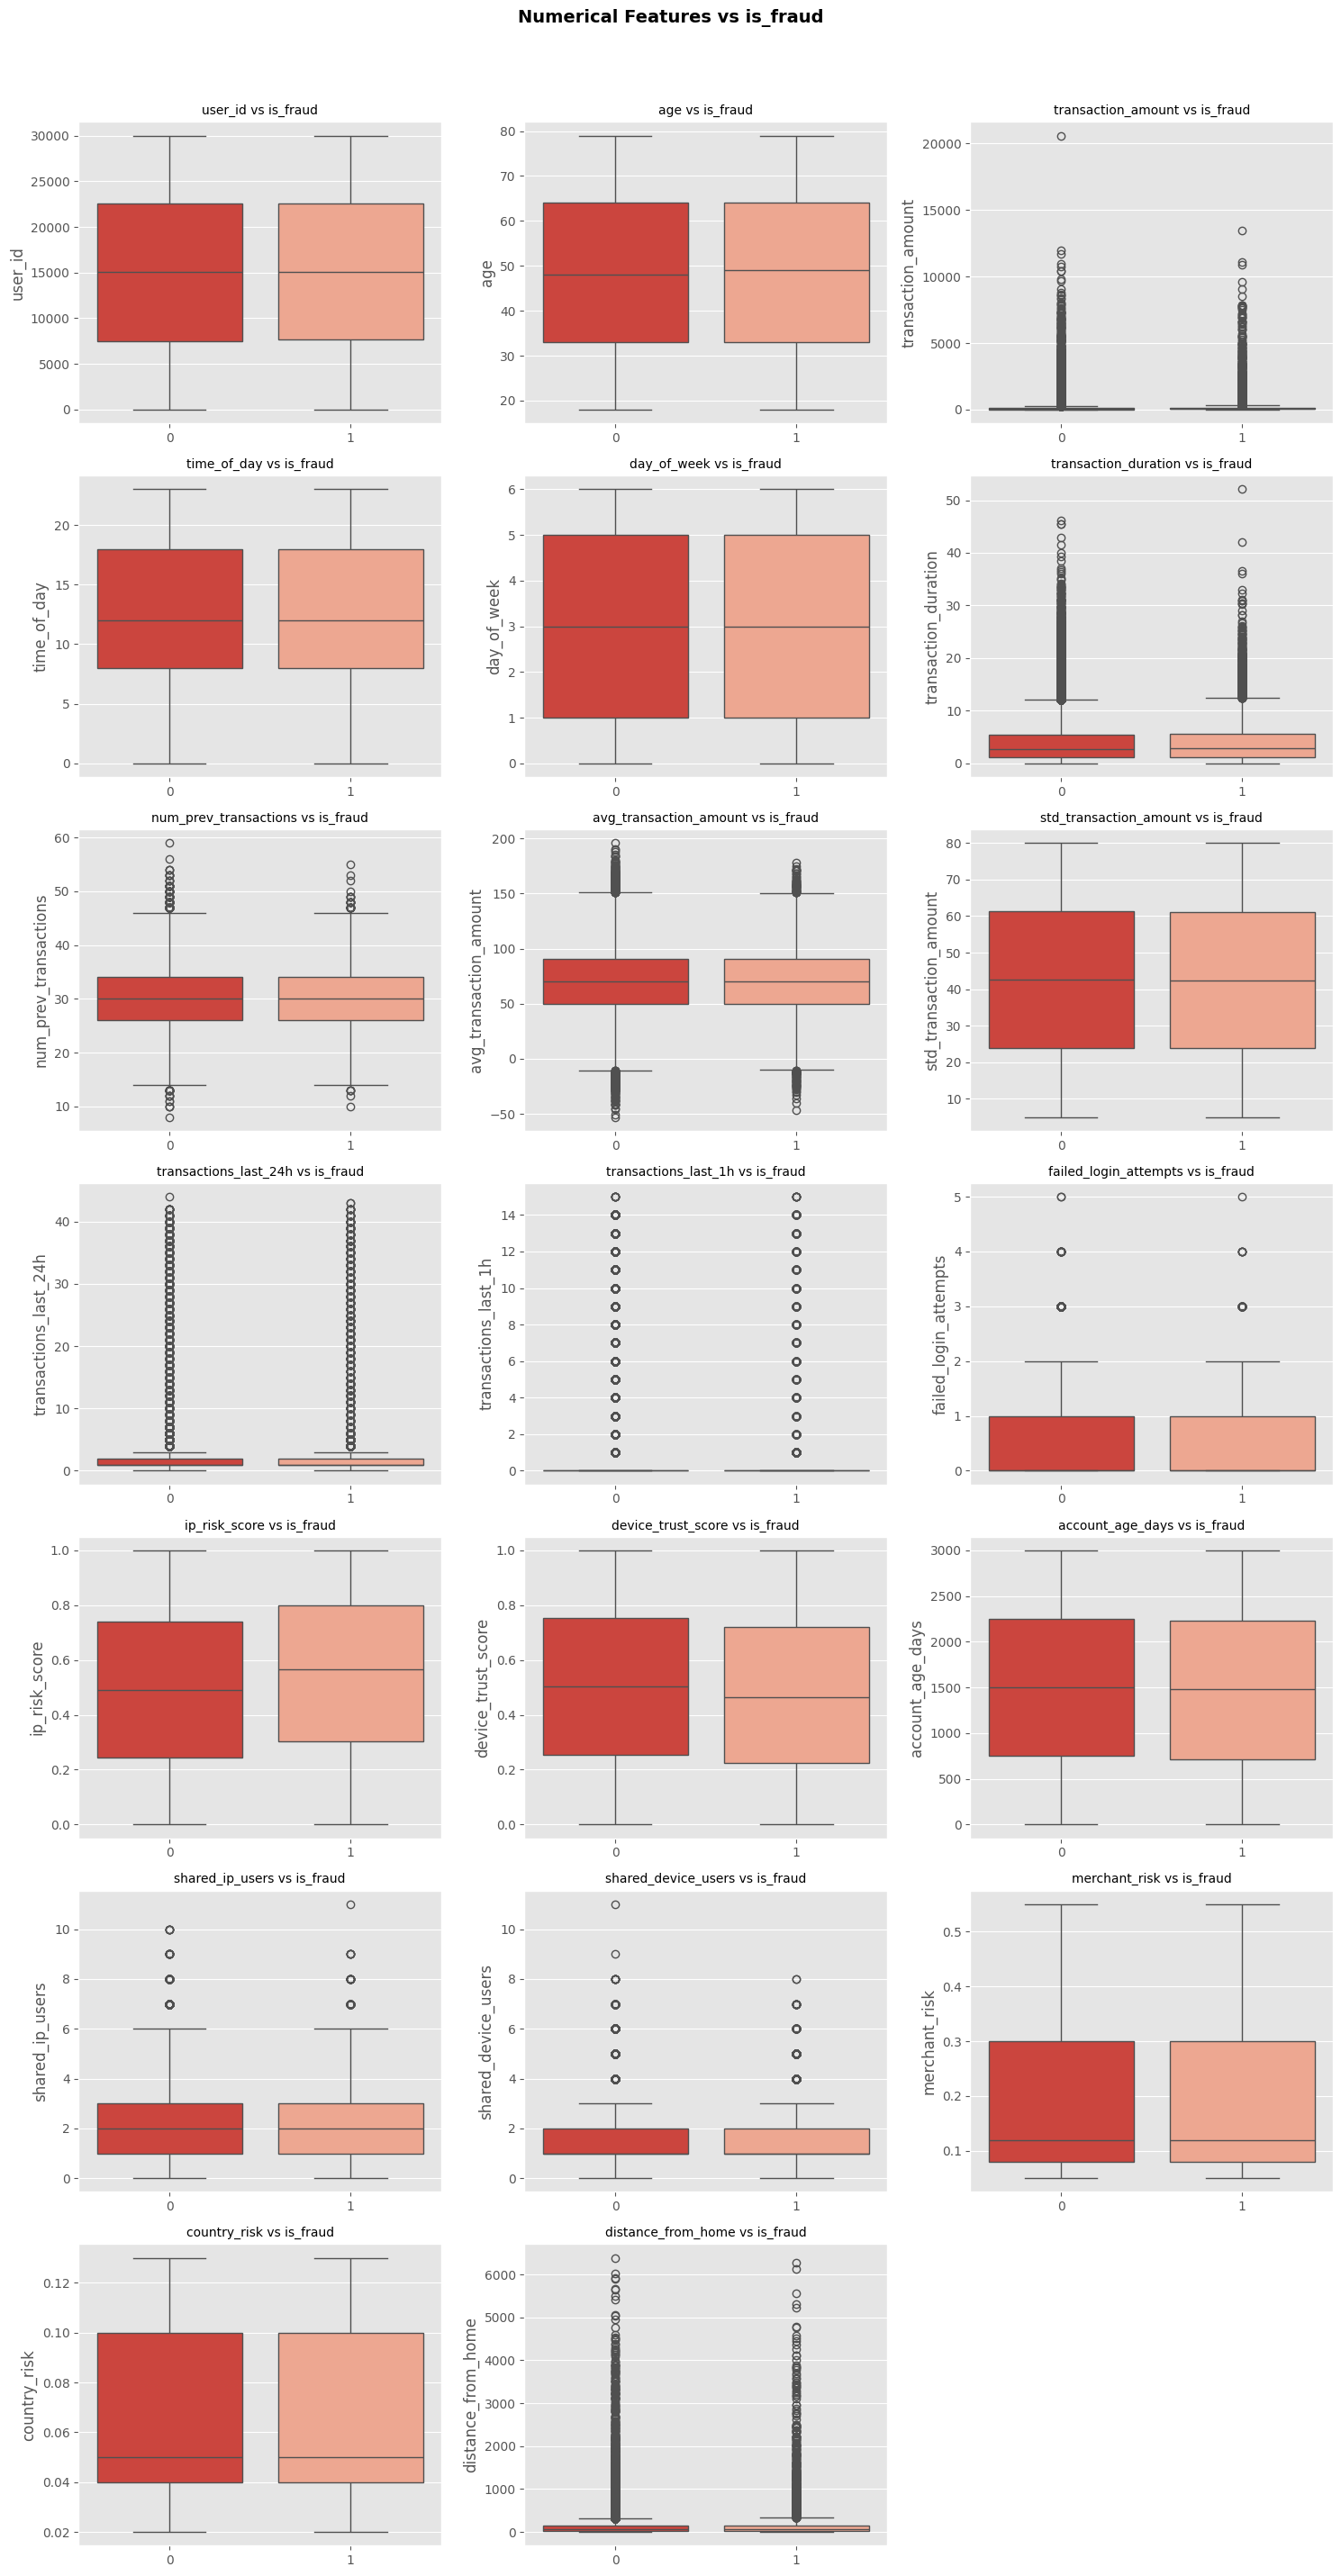

In [58]:
def plot_features_vs_target(dataframe, features, target, n_cols=3, subplot_size=(5, 4)):
    n_rows = (len(features) + n_cols - 1) // n_cols
    
    plt.figure(figsize=(subplot_size[0] * n_cols, subplot_size[1] * n_rows))
    for i, col in enumerate(features):
        plt.subplot(n_rows, n_cols, i + 1)
        sns.boxplot(x=dataframe[target], y=dataframe[col], palette="Reds_r")
        plt.title(f'{col} vs {target}', fontsize=10)
        plt.xlabel('')
    plt.suptitle(f'Numerical Features vs {target}', fontsize=14, y=1.02, weight='bold')
    plt.tight_layout()
    plt.show()

plot_features_vs_target(train, numerical_features, 'is_fraud')

##### 3.4.2. Categorical Features vs Target

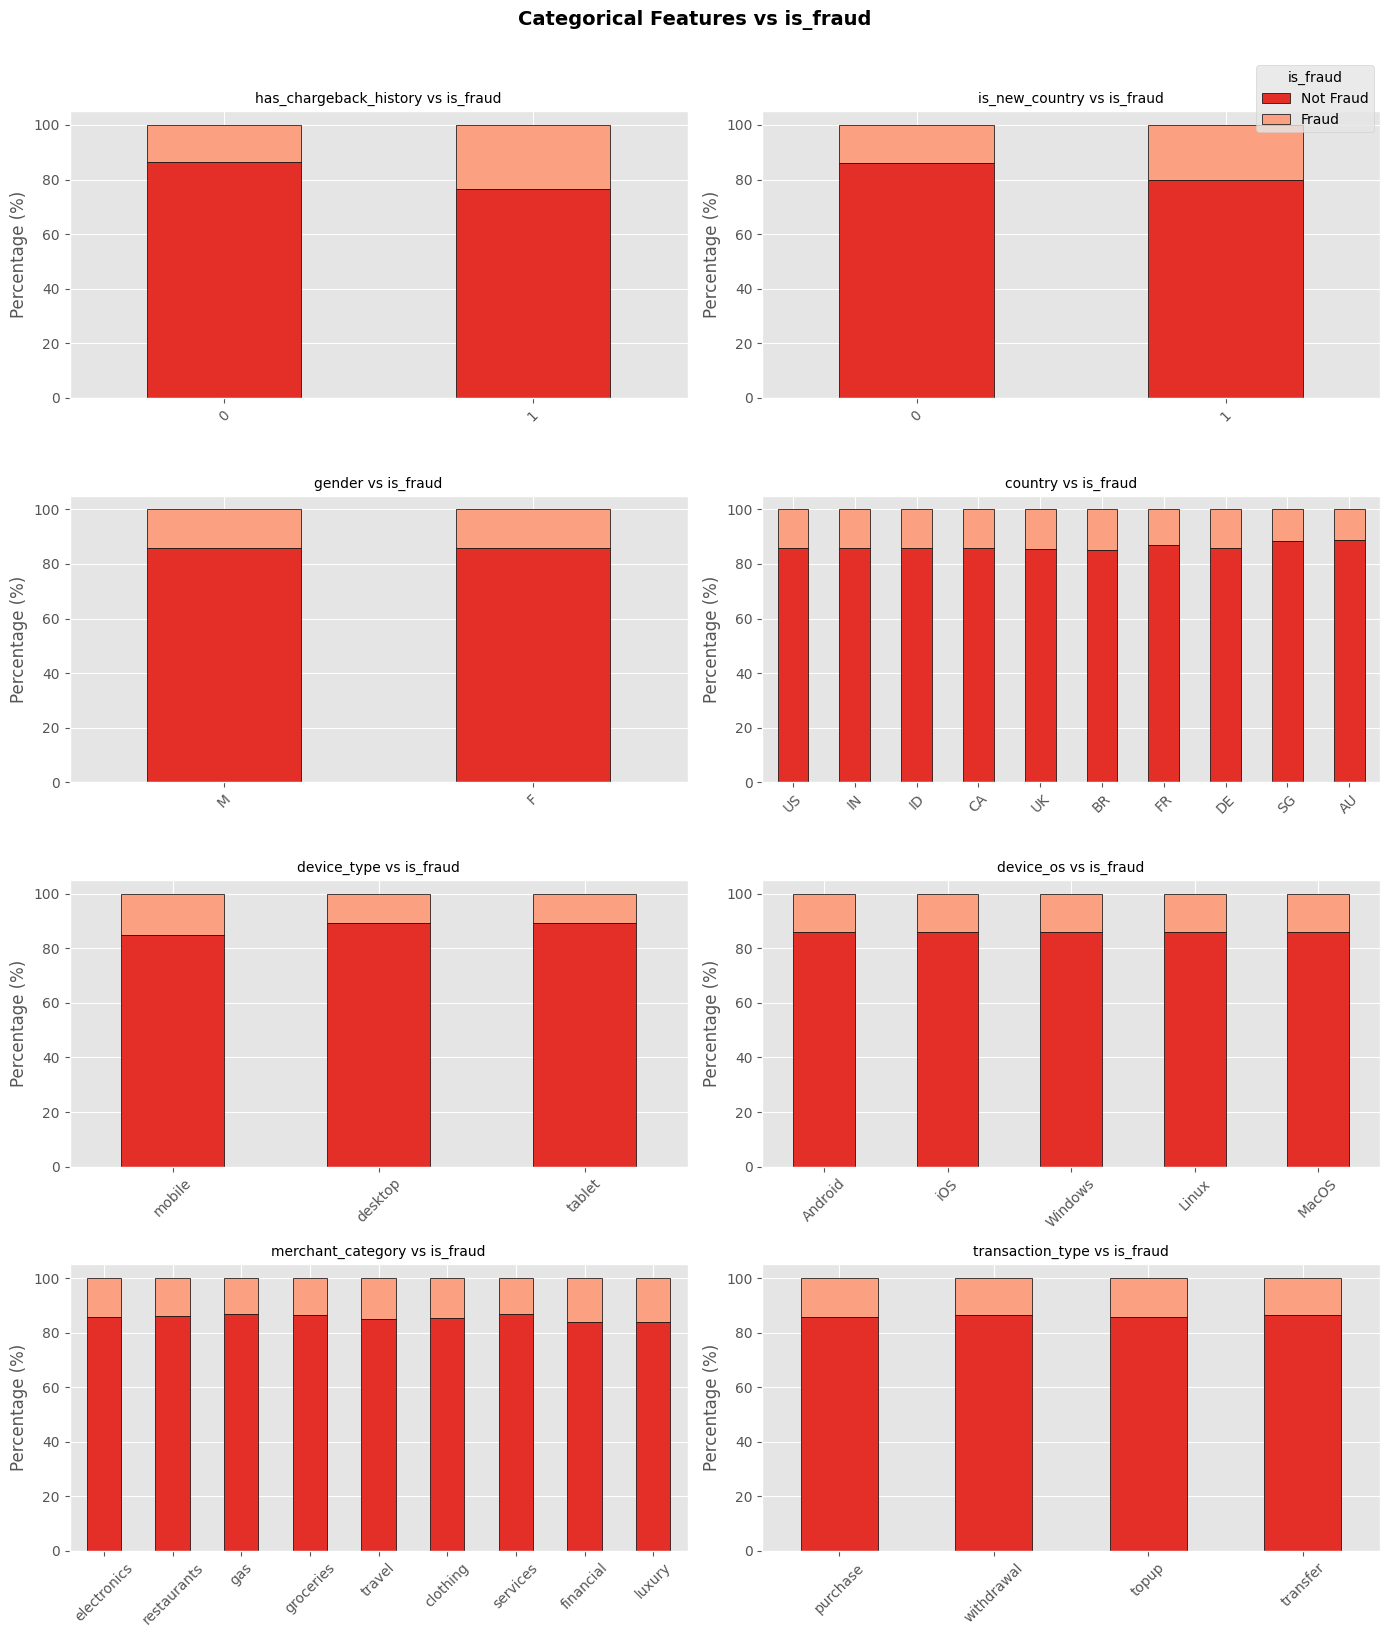

In [59]:
def plot_categorical_vs_target(dataframe, cat_features, target, n_cols=2, subplot_size=(7, 4), top_n=10):
    cat_features = [c for c in cat_features if c != target]
    n_rows = (len(cat_features) + n_cols - 1) // n_cols
    colors = sns.color_palette("Reds_r", 2)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(subplot_size[0] * n_cols, subplot_size[1] * n_rows))
    axes = axes.flatten() if n_rows * n_cols > 1 else [axes]
    
    for i, col in enumerate(cat_features):
        ax = axes[i]
        
        top_categories = dataframe[col].value_counts().head(top_n).index
        df_filtered = dataframe[dataframe[col].isin(top_categories)]
        
        ct = pd.crosstab(df_filtered[col], df_filtered[target], normalize='index') * 100
        ct = ct.reindex(top_categories)
        
        ct.plot(kind='bar', stacked=True, ax=ax, color=colors, edgecolor='black', legend=False)
        ax.set_title(f'{col} vs {target}', fontsize=10)
        ax.set_xlabel('')
        ax.set_ylabel('Percentage (%)')
        ax.tick_params(axis='x', rotation=45)
        
        total_unique = dataframe[col].nunique()
        if total_unique > top_n:
            ax.set_xlabel(f'(top {top_n} of {total_unique})', fontsize=8)
    
    for j in range(len(cat_features), len(axes)):
        axes[j].set_visible(False)
    
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, ['Not Fraud', 'Fraud'], title=target, loc='upper right', bbox_to_anchor=(0.99, 0.99))
    
    plt.suptitle(f'Categorical Features vs {target}', fontsize=14, y=1.02, weight='bold')
    plt.tight_layout()
    plt.show()

plot_categorical_vs_target(train, all_categorical, 'is_fraud')

##### 3.5. Skewness Analysis

In [60]:
from scipy.stats import skew

skewness_data = {}
for col in numerical_features:
    if col != 'is_fraud':
        skew_value = skew(train[col].dropna())
        skewness_data[col] = skew_value

skewness_df = pd.DataFrame({
    'Feature': list(skewness_data.keys()),
    'Skewness': list(skewness_data.values())
})
skewness_df['Abs_Skewness'] = skewness_df['Skewness'].abs()
skewness_df = skewness_df.sort_values('Abs_Skewness', ascending=False)

def categorize_skewness(s):
    if abs(s) > 1:
        return 'Highly Skewed'
    elif abs(s) > 0.5:
        return 'Moderately Skewed'
    else:
        return 'Fairly Symmetric'

skewness_df['Category'] = skewness_df['Skewness'].apply(categorize_skewness)
skewness_df['Direction'] = skewness_df['Skewness'].apply(lambda x: 'Right (+)' if x > 0 else 'Left (-)')

print("=" * 65)
print("SKEWNESS ANALYSIS")
print("=" * 65)
print("\nSkewness Categories:")
print("  • Highly Skewed    : |skewness| > 1")
print("  • Moderately Skewed: 0.5 < |skewness| ≤ 1")
print("  • Fairly Symmetric : |skewness| ≤ 0.5")
print()
print(skewness_df[['Feature', 'Skewness', 'Category', 'Direction']].to_string(index=False))

print("\n" + "-" * 65)
print("SUMMARY:")
highly_skewed = skewness_df[skewness_df['Category'] == 'Highly Skewed']['Feature'].tolist()
moderately_skewed = skewness_df[skewness_df['Category'] == 'Moderately Skewed']['Feature'].tolist()
symmetric = skewness_df[skewness_df['Category'] == 'Fairly Symmetric']['Feature'].tolist()

print(f"  Highly Skewed ({len(highly_skewed)}): {', '.join(highly_skewed) if highly_skewed else 'None'}")
print(f"  Moderately Skewed ({len(moderately_skewed)}): {', '.join(moderately_skewed) if moderately_skewed else 'None'}")
print(f"  Fairly Symmetric ({len(symmetric)}): {', '.join(symmetric) if symmetric else 'None'}")

SKEWNESS ANALYSIS

Skewness Categories:
  • Highly Skewed    : |skewness| > 1
  • Moderately Skewed: 0.5 < |skewness| ≤ 1
  • Fairly Symmetric : |skewness| ≤ 0.5

               Feature  Skewness          Category Direction
    transaction_amount 14.793116     Highly Skewed Right (+)
    distance_from_home 11.370200     Highly Skewed Right (+)
  transactions_last_1h  6.914157     Highly Skewed Right (+)
 transactions_last_24h  6.581311     Highly Skewed Right (+)
  transaction_duration  2.021234     Highly Skewed Right (+)
 failed_login_attempts  1.842116     Highly Skewed Right (+)
   shared_device_users  0.816209 Moderately Skewed Right (+)
       shared_ip_users  0.720484 Moderately Skewed Right (+)
         merchant_risk  0.658472 Moderately Skewed Right (+)
          country_risk  0.272750  Fairly Symmetric Right (+)
           time_of_day -0.184742  Fairly Symmetric  Left (-)
 num_prev_transactions  0.179526  Fairly Symmetric Right (+)
           day_of_week  0.066892  Fairly Sym

# 1. Split Training Set, Validation Set, Testing Set

Splitting the training and validation set works as an early diagnostic towards the performance of the model we train. This is done before the preprocessing steps to **avoid data leakage inbetween the sets**. If you want to use k-fold cross-validation, split the data later and do the cleaning and preprocessing separately for each split.

Note: For training, you should use the data contained in the `train` folder given by the TA. The `test` data is only used for kaggle submission. We split training set and validation set using stratified k-fold validation, ensuring a more reliable evaluation.

In [61]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
print("Using 5-Fold Stratified Cross-Validation for model evaluation")

Using 5-Fold Stratified Cross-Validation for model evaluation


# 2. Data Cleaning and Preprocessing

This step is the first thing to be done once a Data Scientist have grasped a general knowledge of the data. Raw data is **seldom ready for training**, therefore steps need to be taken to clean and format the data for the Machine Learning model to interpret.

By performing data cleaning and preprocessing, you ensure that your dataset is ready for model training, leading to more accurate and reliable machine learning results. These steps are essential for transforming raw data into a format that machine learning algorithms can effectively learn from and make predictions.

We will give some common methods for you to try, but you only have to **at least implement one method for each process**. For each step that you will do, **please explain the reason why did you do that process. Write it in a markdown cell under the code cell you wrote.**

## A. Data Cleaning

**Data cleaning** is the crucial first step in preparing your dataset for machine learning. Raw data collected from various sources is often messy and may contain errors, missing values, and inconsistencies. Data cleaning involves the following steps:

1. **Handling Missing Data:** Identify and address missing values in the dataset. This can include imputing missing values, removing rows or columns with excessive missing data, or using more advanced techniques like interpolation.

2. **Dealing with Outliers:** Identify and handle outliers, which are data points significantly different from the rest of the dataset. Outliers can be removed or transformed to improve model performance.

3. **Data Validation:** Check for data integrity and consistency. Ensure that data types are correct, categorical variables have consistent labels, and numerical values fall within expected ranges.

4. **Removing Duplicates:** Identify and remove duplicate rows, as they can skew the model's training process and evaluation metrics.

5. **Feature Engineering**: Create new features or modify existing ones to extract relevant information. This step can involve scaling, normalizing, or encoding features for better model interpretability.

### I. Handling Missing Data

Missing data can adversely affect the performance and accuracy of machine learning models. There are several strategies to handle missing data in machine learning:

1. **Data Imputation:**

    a. **Mean, Median, or Mode Imputation:** For numerical features, you can replace missing values with the mean, median, or mode of the non-missing values in the same feature. This method is simple and often effective when data is missing at random.

    b. **Constant Value Imputation:** You can replace missing values with a predefined constant value (e.g., 0) if it makes sense for your dataset and problem.

    c. **Imputation Using Predictive Models:** More advanced techniques involve using predictive models to estimate missing values. For example, you can train a regression model to predict missing numerical values or a classification model to predict missing categorical values.

2. **Deletion of Missing Data:**

    a. **Listwise Deletion:** In cases where the amount of missing data is relatively small, you can simply remove rows with missing values from your dataset. However, this approach can lead to a loss of valuable information.

    b. **Column (Feature) Deletion:** If a feature has a large number of missing values and is not critical for your analysis, you can consider removing that feature altogether.

3. **Domain-Specific Strategies:**

    a. **Domain Knowledge:** In some cases, domain knowledge can guide the imputation process. For example, if you know that missing values are related to a specific condition, you can impute them accordingly.

4. **Imputation Libraries:**

    a. **Scikit-Learn:** Scikit-Learn provides a `SimpleImputer` class that can handle basic imputation strategies like mean, median, and mode imputation.

    b. **Fancyimpute:** Fancyimpute is a Python library that offers more advanced imputation techniques, including matrix factorization, k-nearest neighbors, and deep learning-based methods.

The choice of imputation method should be guided by the nature of your data, the amount of missing data, the problem you are trying to solve, and the assumptions you are willing to make.

In [62]:
cols_to_drop = ['ID', 'transaction_id', 'user_id']
train_features = train.drop(columns=['is_fraud'] + cols_to_drop, errors='ignore')
test_features = test.drop(columns=cols_to_drop, errors='ignore')

numerical_cols = train_features.select_dtypes(include=[np.number]).columns.tolist()


train_filled = train_features.copy()
test_filled = test_features.copy()
imputation_values = {}

for col in numerical_cols:
    if col in train_filled.columns and train_filled[col].isnull().any():
        mean_value = train_filled[col].mean()
        train_filled[col] = train_filled[col].fillna(mean_value)
        test_filled[col] = test_filled[col].fillna(mean_value)
        imputation_values[col] = {'type': 'mean', 'value': mean_value}

print("Missing setelah imputasi - Train:", int(train_filled.isnull().sum().sum()))
print("Missing setelah imputasi - Test:", int(test_filled.isnull().sum().sum()))

Missing setelah imputasi - Train: 0
Missing setelah imputasi - Test: 0


After testing multiple approach, we found that using mean gives the best results

### II. Feature Engineering

**Feature engineering** involves creating new features (input variables) or transforming existing ones to improve the performance of machine learning models. Feature engineering aims to enhance the model's ability to learn patterns and make accurate predictions from the data. It's often said that "good features make good models."

1. **Feature Selection:** Feature engineering can involve selecting the most relevant and informative features from the dataset. Removing irrelevant or redundant features not only simplifies the model but also reduces the risk of overfitting.

2. **Creating New Features:** Sometimes, the existing features may not capture the underlying patterns effectively. In such cases, engineers create new features that provide additional information. For example:
   
   - **Polynomial Features:** Engineers may create new features by taking the square, cube, or other higher-order terms of existing numerical features. This can help capture nonlinear relationships.
   
   - **Interaction Features:** Interaction features are created by combining two or more existing features. For example, if you have features "length" and "width," you can create an "area" feature by multiplying them.

3. **Binning or Discretization:** Continuous numerical features can be divided into bins or categories. For instance, age values can be grouped into bins like "child," "adult," and "senior."

4. **Domain-Specific Feature Engineering:** Depending on the domain and problem, engineers may create domain-specific features. For example, in fraud detection, features related to transaction history and user behavior may be engineered to identify anomalies.

Feature engineering is both a creative and iterative process. It requires a deep understanding of the data, domain knowledge, and experimentation to determine which features will enhance the model's predictive power.

### Ratio Features

In [ ]:
ratio_pairs = [
    ('transaction_amount', 'avg_transaction_amount', 'amount_vs_avg_ratio'),
    ('transaction_amount', 'std_transaction_amount', 'amount_vs_std_ratio'),
    ('transactions_last_1h', 'transactions_last_24h', 'hourly_vs_daily_ratio'),
    ('failed_login_attempts', 'num_prev_transactions', 'failed_vs_total_ratio'),
    ('shared_ip_users', 'shared_device_users', 'ip_vs_device_shared_ratio'),
]

for num, denom, name in ratio_pairs:
    if num in train_filled.columns and denom in train_filled.columns:
        denom_safe = train_filled[denom].replace(0, 1e-10)
        train_filled[name] = train_filled[num] / denom_safe
        
        denom_safe = test_filled[denom].replace(0, 1e-10)
        test_filled[name] = test_filled[num] / denom_safe
        
        print(f"Created ratio feature: {name}")

print(f"\nTotal features after ratio creation: {train_filled.shape[1]}")

Created ratio feature: amount_vs_avg_ratio
Created ratio feature: amount_vs_std_ratio
Created ratio feature: hourly_vs_daily_ratio
Created ratio feature: failed_vs_total_ratio
Created ratio feature: ip_vs_device_shared_ratio

Total features after ratio creation: 32


### Log-Transformed Features

In [ ]:
log_candidates =  train.select_dtypes(include=[np.number]).columns
for col in log_candidates:
    if col in train_filled.columns:
        min_val = train_filled[col].min()
        if min_val >= 0:
            train_filled[f'{col}_log'] = np.log1p(train_filled[col])
            test_filled[f'{col}_log'] = np.log1p(test_filled[col])
            print(f"Created log feature: {col}_log")

print(f"\nTotal features after log transformation: {train_filled.shape[1]}")

Created log feature: age_log
Created log feature: transaction_amount_log
Created log feature: time_of_day_log
Created log feature: day_of_week_log
Created log feature: transaction_duration_log
Created log feature: num_prev_transactions_log
Created log feature: std_transaction_amount_log
Created log feature: transactions_last_24h_log
Created log feature: transactions_last_1h_log
Created log feature: failed_login_attempts_log
Created log feature: ip_risk_score_log
Created log feature: device_trust_score_log
Created log feature: account_age_days_log
Created log feature: has_chargeback_history_log
Created log feature: shared_ip_users_log
Created log feature: shared_device_users_log
Created log feature: merchant_risk_log
Created log feature: country_risk_log
Created log feature: distance_from_home_log
Created log feature: is_new_country_log

Total features after log transformation: 52


### Interaction Features

In [ ]:
if 'ip_risk_score' in train_filled.columns and 'device_trust_score' in train_filled.columns:
    train_filled['risk_interaction'] = train_filled['ip_risk_score'] * (1 - train_filled['device_trust_score'] / 100)
    test_filled['risk_interaction'] = test_filled['ip_risk_score'] * (1 - test_filled['device_trust_score'] / 100)
    print("Created: risk_interaction")

if 'merchant_risk' in train_filled.columns and 'country_risk' in train_filled.columns:
    train_filled['merchant_country_risk'] = train_filled['merchant_risk'] * train_filled['country_risk']
    test_filled['merchant_country_risk'] = test_filled['merchant_risk'] * test_filled['country_risk']
    print("Created: merchant_country_risk")

if 'transaction_amount' in train_filled.columns and 'avg_transaction_amount' in train_filled.columns:
    std_col = 'std_transaction_amount'
    if std_col in train_filled.columns and train_filled[std_col].mean() > 0:
        train_filled['amount_zscore'] = (train_filled['transaction_amount'] - train_filled['avg_transaction_amount']) / (train_filled[std_col] + 1e-6)
        test_filled['amount_zscore'] = (test_filled['transaction_amount'] - test_filled['avg_transaction_amount']) / (test_filled[std_col] + 1e-6)
        print("Created: amount_zscore")

if 'transactions_last_24h' in train_filled.columns and 'transactions_last_1h' in train_filled.columns:
    train_filled['hourly_concentration'] = train_filled['transactions_last_1h'] / (train_filled['transactions_last_24h'] + 1)
    test_filled['hourly_concentration'] = test_filled['transactions_last_1h'] / (test_filled['transactions_last_24h'] + 1)
    print("Created: hourly_concentration")

if 'account_age_days' in train_filled.columns and 'num_prev_transactions' in train_filled.columns:
    train_filled['tx_per_day_age'] = train_filled['num_prev_transactions'] / (train_filled['account_age_days'] + 1)
    test_filled['tx_per_day_age'] = test_filled['num_prev_transactions'] / (test_filled['account_age_days'] + 1)
    print("Created: tx_per_day_age")

if 'is_new_country' in train_filled.columns and 'distance_from_home' in train_filled.columns:
    train_filled['new_location_distance'] = train_filled['is_new_country'] * train_filled['distance_from_home']
    test_filled['new_location_distance'] = test_filled['is_new_country'] * test_filled['distance_from_home']
    print("Created: new_location_distance")

if 'failed_login_attempts' in train_filled.columns and 'transaction_amount' in train_filled.columns:
    train_filled['failed_login_amount'] = train_filled['failed_login_attempts'] * train_filled['transaction_amount']
    test_filled['failed_login_amount'] = test_filled['failed_login_attempts'] * test_filled['transaction_amount']
    print("Created: failed_login_amount")

if 'shared_ip_users' in train_filled.columns and 'shared_device_users' in train_filled.columns:
    train_filled['total_shared_users'] = train_filled['shared_ip_users'] + train_filled['shared_device_users']
    test_filled['total_shared_users'] = test_filled['shared_ip_users'] + test_filled['shared_device_users']
    
    train_filled['shared_resource_product'] = train_filled['shared_ip_users'] * train_filled['shared_device_users']
    test_filled['shared_resource_product'] = test_filled['shared_ip_users'] * test_filled['shared_device_users']
    print("Created: total_shared_users, shared_resource_product")

if 'time_of_day' in train_filled.columns:
    train_filled['is_night_time'] = ((train_filled['time_of_day'] >= 0) & (train_filled['time_of_day'] <= 6) | 
                                      (train_filled['time_of_day'] >= 22)).astype(float)
    test_filled['is_night_time'] = ((test_filled['time_of_day'] >= 0) & (test_filled['time_of_day'] <= 6) | 
                                     (test_filled['time_of_day'] >= 22)).astype(float)
    print("Created: is_night_time")

if 'day_of_week' in train_filled.columns:
    train_filled['is_weekend'] = (train_filled['day_of_week'] >= 5).astype(float)
    test_filled['is_weekend'] = (test_filled['day_of_week'] >= 5).astype(float)
    print("Created: is_weekend")

if 'has_chargeback_history' in train_filled.columns and 'transaction_amount' in train_filled.columns:
    train_filled['chargeback_high_amount'] = train_filled['has_chargeback_history'] * (train_filled['transaction_amount'] > train_filled['transaction_amount'].median()).astype(float)
    test_filled['chargeback_high_amount'] = test_filled['has_chargeback_history'] * (test_filled['transaction_amount'] > train_filled['transaction_amount'].median()).astype(float)
    print("Created: chargeback_high_amount")

if 'ip_risk_score' in train_filled.columns and 'transaction_amount' in train_filled.columns:
    train_filled['high_risk_high_amount'] = train_filled['ip_risk_score'] * train_filled['transaction_amount']
    test_filled['high_risk_high_amount'] = test_filled['ip_risk_score'] * test_filled['transaction_amount']
    print("Created: high_risk_high_amount")

if 'failed_login_attempts' in train_filled.columns and 'ip_risk_score' in train_filled.columns:
    train_filled['failed_login_risk'] = train_filled['failed_login_attempts'] * train_filled['ip_risk_score']
    test_filled['failed_login_risk'] = test_filled['failed_login_attempts'] * test_filled['ip_risk_score']
    print("Created: failed_login_risk")

if 'is_new_country' in train_filled.columns and 'transaction_amount' in train_filled.columns:
    train_filled['new_country_amount'] = train_filled['is_new_country'] * train_filled['transaction_amount']
    test_filled['new_country_amount'] = test_filled['is_new_country'] * test_filled['transaction_amount']
    print("Created: new_country_amount")

if 'ip_risk_score' in train_filled.columns:
    train_filled['ip_risk_squared'] = train_filled['ip_risk_score'] ** 2
    test_filled['ip_risk_squared'] = test_filled['ip_risk_score'] ** 2
    print("Created: ip_risk_squared")

if 'merchant_risk' in train_filled.columns:
    train_filled['merchant_risk_squared'] = train_filled['merchant_risk'] ** 2
    test_filled['merchant_risk_squared'] = test_filled['merchant_risk'] ** 2
    print("Created: merchant_risk_squared")

if 'country_risk' in train_filled.columns:
    train_filled['country_risk_squared'] = train_filled['country_risk'] ** 2
    test_filled['country_risk_squared'] = test_filled['country_risk'] ** 2
    print("Created: country_risk_squared")

risk_cols = []
if 'ip_risk_score' in train_filled.columns:
    risk_cols.append('ip_risk_score')
if 'merchant_risk' in train_filled.columns:
    risk_cols.append('merchant_risk')
if 'country_risk' in train_filled.columns:
    risk_cols.append('country_risk')
if len(risk_cols) > 0:
    train_filled['combined_risk'] = train_filled[risk_cols].mean(axis=1)
    test_filled['combined_risk'] = test_filled[risk_cols].mean(axis=1)
    print("Created: combined_risk")


percentile_cols = ['transaction_amount', 'distance_from_home', 'ip_risk_score', 
                   'merchant_risk', 'country_risk', 'account_age_days']

for col in percentile_cols:
    if col in train_filled.columns:
        train_filled[f'{col}_percentile'] = train_filled[col].rank(pct=True)
        
        train_sorted = np.sort(train_filled[col].dropna().values)
        test_filled[f'{col}_percentile'] = test_filled[col].apply(
            lambda x: np.searchsorted(train_sorted, x) / len(train_sorted) if pd.notna(x) else 0.5
        )
        print(f"  Created: {col}_percentile")

print("\n--- 2. Binned Risk Categories ---")

def create_risk_bins(series, bins=[0, 0.2, 0.4, 0.6, 0.8, 1.0], labels=['very_low', 'low', 'medium', 'high', 'very_high']):
    return pd.cut(series, bins=bins, labels=labels, include_lowest=True)

risk_bin_cols = ['ip_risk_score', 'merchant_risk', 'country_risk']
for col in risk_bin_cols:
    if col in train_filled.columns:
        train_bins = create_risk_bins(train_filled[col])
        test_bins = create_risk_bins(test_filled[col])
        
        for label in ['very_low', 'low', 'medium', 'high', 'very_high']:
            train_filled[f'{col}_bin_{label}'] = (train_bins == label).astype(int)
            test_filled[f'{col}_bin_{label}'] = (test_bins == label).astype(int)
        print(f"  Binned: {col} into 5 risk levels")


print("\n--- 3. Frequency Encoding ---")

print("\n--- 4. Anomaly Score Features ---")

anomaly_cols = ['transaction_amount', 'distance_from_home', 'transactions_last_1h', 
                'transactions_last_24h', 'failed_login_attempts']

for col in anomaly_cols:
    if col in train_filled.columns:
        col_mean = train_filled[col].mean()
        col_std = train_filled[col].std()
        
        if col_std > 0:
            train_filled[f'{col}_zscore'] = (train_filled[col] - col_mean) / col_std
            test_filled[f'{col}_zscore'] = (test_filled[col] - col_mean) / col_std
            
            train_filled[f'{col}_is_outlier'] = (np.abs(train_filled[f'{col}_zscore']) > 2).astype(int)
            test_filled[f'{col}_is_outlier'] = (np.abs(test_filled[f'{col}_zscore']) > 2).astype(int)
            
            print(f"  Created: {col}_zscore, {col}_is_outlier")

outlier_cols = [c for c in train_filled.columns if c.endswith('_is_outlier')]
if len(outlier_cols) > 0:
    train_filled['total_outlier_count'] = train_filled[outlier_cols].sum(axis=1)
    test_filled['total_outlier_count'] = test_filled[outlier_cols].sum(axis=1)
    print(f"  Created: total_outlier_count (sum of {len(outlier_cols)} outlier flags)")

print("\n--- 5. Velocity Features ---")

if 'transactions_last_1h' in train_filled.columns and 'transactions_last_24h' in train_filled.columns:
    train_filled['tx_burst_ratio'] = train_filled['transactions_last_1h'] / (train_filled['transactions_last_24h'] / 24 + 0.1)
    test_filled['tx_burst_ratio'] = test_filled['transactions_last_1h'] / (test_filled['transactions_last_24h'] / 24 + 0.1)
    
    train_filled['is_tx_burst'] = (train_filled['tx_burst_ratio'] > 3).astype(int)
    test_filled['is_tx_burst'] = (test_filled['tx_burst_ratio'] > 3).astype(int)
    print("  Created: tx_burst_ratio, is_tx_burst")

if 'transaction_amount' in train_filled.columns and 'avg_transaction_amount' in train_filled.columns:
    train_filled['amount_deviation_ratio'] = train_filled['transaction_amount'] / (train_filled['avg_transaction_amount'] + 1)
    test_filled['amount_deviation_ratio'] = test_filled['transaction_amount'] / (test_filled['avg_transaction_amount'] + 1)
    
    train_filled['is_unusual_amount'] = (train_filled['amount_deviation_ratio'] > 3).astype(int)
    test_filled['is_unusual_amount'] = (test_filled['amount_deviation_ratio'] > 3).astype(int)
    print("  Created: amount_deviation_ratio, is_unusual_amount")


print("\n--- 6. Composite Risk Scores ---")

risk_flags = []

if 'is_new_country' in train_filled.columns:
    risk_flags.append('is_new_country')
if 'has_chargeback_history' in train_filled.columns:
    risk_flags.append('has_chargeback_history')
if 'failed_login_attempts' in train_filled.columns:
    train_filled['has_failed_logins'] = (train_filled['failed_login_attempts'] > 0).astype(int)
    test_filled['has_failed_logins'] = (test_filled['failed_login_attempts'] > 0).astype(int)
    risk_flags.append('has_failed_logins')
if 'is_tx_burst' in train_filled.columns:
    risk_flags.append('is_tx_burst')
if 'is_unusual_amount' in train_filled.columns:
    risk_flags.append('is_unusual_amount')
if 'is_night_time' in train_filled.columns:
    risk_flags.append('is_night_time')

if len(risk_flags) > 0:
    train_filled['risk_flag_count'] = train_filled[risk_flags].sum(axis=1)
    test_filled['risk_flag_count'] = test_filled[risk_flags].sum(axis=1)
    print(f"  Created: risk_flag_count (sum of {len(risk_flags)} flags)")

# Weighted risk score (risk scores * amount = impact)
if 'combined_risk' in train_filled.columns and 'transaction_amount' in train_filled.columns:
    # Normalize amount to 0-1 range using training data
    amount_max = train_filled['transaction_amount'].max()
    train_filled['weighted_risk_impact'] = train_filled['combined_risk'] * (train_filled['transaction_amount'] / amount_max)
    test_filled['weighted_risk_impact'] = test_filled['combined_risk'] * (test_filled['transaction_amount'] / amount_max)
    print("  Created: weighted_risk_impact")

# -------------------------------------------------------------------------
# 7. DEVICE & SESSION RISK FEATURES
# -------------------------------------------------------------------------
print("\n--- 7. Device & Session Risk Features ---")

# Multi-user device/IP (shared resources = higher risk)
if 'shared_ip_users' in train_filled.columns and 'shared_device_users' in train_filled.columns:
    # Max shared users (IP or device)
    train_filled['max_shared_users'] = train_filled[['shared_ip_users', 'shared_device_users']].max(axis=1)
    test_filled['max_shared_users'] = test_filled[['shared_ip_users', 'shared_device_users']].max(axis=1)
    
    # Is shared device/IP
    train_filled['is_shared_resource'] = ((train_filled['shared_ip_users'] > 1) | (train_filled['shared_device_users'] > 1)).astype(int)
    test_filled['is_shared_resource'] = ((test_filled['shared_ip_users'] > 1) | (test_filled['shared_device_users'] > 1)).astype(int)
    print("  Created: max_shared_users, is_shared_resource")

# Device trust vs IP risk discrepancy
if 'device_trust_score' in train_filled.columns and 'ip_risk_score' in train_filled.columns:
    # High IP risk but high device trust = suspicious (stolen device?)
    train_filled['trust_risk_discrepancy'] = train_filled['ip_risk_score'] - (1 - train_filled['device_trust_score']/100)
    test_filled['trust_risk_discrepancy'] = test_filled['ip_risk_score'] - (1 - test_filled['device_trust_score']/100)
    print("  Created: trust_risk_discrepancy")

# -------------------------------------------------------------------------
# 8. TIME PATTERN FEATURES
# -------------------------------------------------------------------------
print("\n--- 8. Time Pattern Features ---")

if 'time_of_day' in train_filled.columns:
    # Cyclical encoding for time (captures that 23:00 is close to 01:00)
    train_filled['time_sin'] = np.sin(2 * np.pi * train_filled['time_of_day'] / 24)
    train_filled['time_cos'] = np.cos(2 * np.pi * train_filled['time_of_day'] / 24)
    test_filled['time_sin'] = np.sin(2 * np.pi * test_filled['time_of_day'] / 24)
    test_filled['time_cos'] = np.cos(2 * np.pi * test_filled['time_of_day'] / 24)
    print("  Created: time_sin, time_cos (cyclical encoding)")
    
    # Time buckets (morning, afternoon, evening, night)
    def get_time_bucket(hour):
        if 6 <= hour < 12:
            return 'morning'
        elif 12 <= hour < 18:
            return 'afternoon'
        elif 18 <= hour < 22:
            return 'evening'
        else:
            return 'night'
    
    for bucket in ['morning', 'afternoon', 'evening', 'night']:
        train_filled[f'time_{bucket}'] = train_filled['time_of_day'].apply(lambda x: 1 if get_time_bucket(x) == bucket else 0)
        test_filled[f'time_{bucket}'] = test_filled['time_of_day'].apply(lambda x: 1 if get_time_bucket(x) == bucket else 0)
    print("  Created: time_morning, time_afternoon, time_evening, time_night")

if 'day_of_week' in train_filled.columns:
    # Cyclical encoding for day of week
    train_filled['day_sin'] = np.sin(2 * np.pi * train_filled['day_of_week'] / 7)
    train_filled['day_cos'] = np.cos(2 * np.pi * train_filled['day_of_week'] / 7)
    test_filled['day_sin'] = np.sin(2 * np.pi * test_filled['day_of_week'] / 7)
    test_filled['day_cos'] = np.cos(2 * np.pi * test_filled['day_of_week'] / 7)
    print("  Created: day_sin, day_cos (cyclical encoding)")

# -------------------------------------------------------------------------
# 9. ACCOUNT AGE RISK FEATURES
# -------------------------------------------------------------------------
print("\n--- 9. Account Age Risk Features ---")

if 'account_age_days' in train_filled.columns:
    # Is new account? (< 30 days)
    train_filled['is_new_account'] = (train_filled['account_age_days'] < 30).astype(int)
    test_filled['is_new_account'] = (test_filled['account_age_days'] < 30).astype(int)
    
    # Account age buckets
    def get_account_age_bucket(days):
        if days < 7:
            return 'very_new'
        elif days < 30:
            return 'new'
        elif days < 90:
            return 'established'
        elif days < 365:
            return 'mature'
        else:
            return 'veteran'
    
    for bucket in ['very_new', 'new', 'established', 'mature', 'veteran']:
        train_filled[f'account_{bucket}'] = train_filled['account_age_days'].apply(lambda x: 1 if get_account_age_bucket(x) == bucket else 0)
        test_filled[f'account_{bucket}'] = test_filled['account_age_days'].apply(lambda x: 1 if get_account_age_bucket(x) == bucket else 0)
    print("  Created: is_new_account, account_age_buckets")
    
    if 'transaction_amount' in train_filled.columns:
        amount_median = train_filled['transaction_amount'].median()
        train_filled['new_account_high_tx'] = (train_filled['is_new_account'] * (train_filled['transaction_amount'] > amount_median)).astype(int)
        test_filled['new_account_high_tx'] = (test_filled['is_new_account'] * (test_filled['transaction_amount'] > amount_median)).astype(int)
        print("  Created: new_account_high_tx")

print("\n" + "=" * 60)
print(f"Total features after advanced engineering: {train_filled.shape[1]}")
print("=" * 60)

Created: risk_interaction
Created: merchant_country_risk
Created: amount_zscore
Created: hourly_concentration
Created: tx_per_day_age
Created: new_location_distance
Created: failed_login_amount
Created: total_shared_users, shared_resource_product
Created: is_night_time
Created: is_weekend
Created: chargeback_high_amount
Created: high_risk_high_amount
Created: failed_login_risk
Created: new_country_amount
Created: ip_risk_squared
Created: merchant_risk_squared
Created: country_risk_squared
Created: combined_risk
  Created: transaction_amount_percentile
  Created: distance_from_home_percentile
  Created: ip_risk_score_percentile
  Created: merchant_risk_percentile
  Created: country_risk_percentile
  Created: account_age_days_percentile

--- 2. Binned Risk Categories ---
  Binned: ip_risk_score into 5 risk levels
  Binned: merchant_risk into 5 risk levels
  Binned: country_risk into 5 risk levels

--- 3. Frequency Encoding ---
  Created: device_type_frequency, device_type_is_rare

--- 4.

C:\Users\Persada\AppData\Local\Temp\ipykernel_26216\1594143351.py:327: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_filled[f'time_{bucket}'] = train_filled['time_of_day'].apply(lambda x: 1 if get_time_bucket(x) == bucket else 0)
C:\Users\Persada\AppData\Local\Temp\ipykernel_26216\1594143351.py:328: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_filled[f'time_{bucket}'] = test_filled['time_of_day'].apply(lambda x: 1 if get_time_bucket(x) == bucket else 0)
C:\Users\Persada\AppData\Local\Temp\ipykernel_26216\1594143351.p

  Created: time_morning, time_afternoon, time_evening, time_night
  Created: day_sin, day_cos (cyclical encoding)

--- 9. Account Age Risk Features ---


C:\Users\Persada\AppData\Local\Temp\ipykernel_26216\1594143351.py:363: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_filled[f'account_{bucket}'] = train_filled['account_age_days'].apply(lambda x: 1 if get_account_age_bucket(x) == bucket else 0)
C:\Users\Persada\AppData\Local\Temp\ipykernel_26216\1594143351.py:364: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_filled[f'account_{bucket}'] = test_filled['account_age_days'].apply(lambda x: 1 if get_account_age_bucket(x) == bucket else 0)
C:\Users\Persada\AppData\Local\Tem

  Created: is_new_account, account_age_buckets
  Created: new_account_high_tx

Total features after advanced engineering: 130


C:\Users\Persada\AppData\Local\Temp\ipykernel_26216\1594143351.py:364: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_filled[f'account_{bucket}'] = test_filled['account_age_days'].apply(lambda x: 1 if get_account_age_bucket(x) == bucket else 0)
C:\Users\Persada\AppData\Local\Temp\ipykernel_26216\1594143351.py:370: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_filled['new_account_high_tx'] = (train_filled['is_new_account'] * (train_filled['transaction_amount'] > amount_median)).astype(int)
C:\Users\Persada\AppData\Local

In [ ]:
numerical_cols = train_filled.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = train_filled.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"Features after engineering:")
print(f"  - Numerical: {len(numerical_cols)}")
print(f"  - Categorical: {len(categorical_cols)}")

Features after engineering:
  - Numerical: 124
  - Categorical: 6


### Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

train_encoded = train_filled.copy()

ohe = OneHotEncoder(
    handle_unknown="ignore",
    sparse_output=False
)

encoded_array = ohe.fit_transform(train_encoded[categorical_cols])

encoded_feature_names = ohe.get_feature_names_out(categorical_cols)

encoded_df = pd.DataFrame(
    encoded_array,
    columns=encoded_feature_names,
    index=train_encoded.index
)

encoding_info = {
    col: list(cats)
    for col, cats in zip(categorical_cols, ohe.categories_)
}

train_encoded = pd.concat(
    [train_encoded.drop(columns=categorical_cols), encoded_df],
    axis=1
)

print(f"Shape after encoding: {train_encoded.shape}")

Shape after encoding: (100000, 157)


In [ ]:
test_encoded = test_filled.copy()
encoded_test_array = ohe.transform(test_encoded[categorical_cols])

encoded_test_df = pd.DataFrame(
    encoded_test_array,
    columns=ohe.get_feature_names_out(categorical_cols),
    index=test_encoded.index
)

test_encoded = pd.concat(
    [test_encoded.drop(columns=categorical_cols), encoded_test_df],
    axis=1
)

print(f"Test shape after encoding: {test_encoded.shape}")

Test shape after encoding: (100000, 157)


In [ ]:
train_cols = set(train_encoded.columns)
test_cols = set(test_encoded.columns)

for col in train_cols - test_cols:
    test_encoded[col] = 0
    print(f"Added missing column to test: {col}")

for col in test_cols - train_cols:
    train_encoded[col] = 0
    print(f"Added missing column to train: {col}")

all_cols = sorted(train_encoded.columns.tolist())
train_encoded = train_encoded[all_cols]
test_encoded = test_encoded[all_cols]

print(f"\nFinal shapes:")
print(f"  Train: {train_encoded.shape}")
print(f"  Test: {test_encoded.shape}")


Final shapes:
  Train: (100000, 157)
  Test: (100000, 157)


In [ ]:
from sklearn.preprocessing import TargetEncoder
import pandas as pd

te = TargetEncoder(
    smooth="auto",
    target_type="binary" 
)

te_array = te.fit_transform(
    train_filled[categorical_cols],
    y_train
)

te_feature_names = [f"{col}_te" for col in categorical_cols]
te_train_df = pd.DataFrame(
    te_array,
    columns=te_feature_names,
    index=train_filled.index
)

train_encoded = pd.concat(
    [train_encoded, te_train_df],
    axis=1
)

print(f"Train shape after adding target encoding: {train_encoded.shape}")


Train shape after adding target encoding: (100000, 163)


In [ ]:
te_test_array = te.transform(test_filled[categorical_cols])

te_test_df = pd.DataFrame(
    te_test_array,
    columns=te_feature_names,
    index=test_filled.index
)

test_encoded = pd.concat(
    [test_encoded, te_test_df],
    axis=1
)

print(f"Test shape after adding target encoding: {test_encoded.shape}")


Test shape after adding target encoding: (100000, 163)


In [ ]:
freq_encode_cols = ['payment_method', 'device_type', 'browser']

for col in freq_encode_cols:
    if col in train_filled.columns:
        freq_map = train_filled[col].value_counts(normalize=True).to_dict()
        
        train_filled[f'{col}_frequency'] = train_filled[col].map(freq_map).fillna(0)
        test_filled[f'{col}_frequency'] = test_filled[col].map(freq_map).fillna(0) 
        
        train_filled[f'{col}_is_rare'] = (train_filled[f'{col}_frequency'] < 0.05).astype(int)
        test_filled[f'{col}_is_rare'] = (test_filled[f'{col}_frequency'] < 0.05).astype(int)
        

We use both target encoding, frequency encoding, and one hot encoding because the combination of both increases the model performance

### II. Dealing with Outliers

Outliers are data points that significantly differ from the majority of the data. They can be unusually high or low values that do not fit the pattern of the rest of the dataset. Outliers can significantly impact model performance, so it is important to handle them properly.

Some methods to handle outliers:
1. **Imputation**: Replace with mean, median, or a boundary value.
2. **Clipping**: Cap values to upper and lower limits.
3. **Transformation**: Use log, square root, or power transformations to reduce their influence.
4. **Model-Based**: Use algorithms robust to outliers (e.g., tree-based models, Huber regression).

In [72]:
print("Data cleaning summary:")
print(f"Train shape: {train_filled.shape}")
print(f"Test shape: {test_filled.shape}")

Data cleaning summary:
Train shape: (100000, 130)
Test shape: (100000, 130)


### Clipping

In [ ]:
train_values = train_encoded.values.copy()
test_values = test_encoded.values.copy()

n_features = train_values.shape[1]
clip_bounds = {'lower': [], 'upper': []}

lower_percentile = 1
upper_percentile = 99

for i in range(n_features):
    lower = np.percentile(train_values[:, i], lower_percentile)
    upper = np.percentile(train_values[:, i], upper_percentile)
    
    clip_bounds['lower'].append(lower)
    clip_bounds['upper'].append(upper)
    
    train_values[:, i] = np.clip(train_values[:, i], lower, upper)

print(f"Clipped outliers in training data using {lower_percentile}th and {upper_percentile}th percentiles")
print(f"Shape: {train_values.shape}")

Clipped outliers in training data using 1th and 99th percentiles
Shape: (100000, 163)


In [ ]:
for i in range(test_values.shape[1]):
    test_values[:, i] = np.clip(test_values[:, i], clip_bounds['lower'][i], clip_bounds['upper'][i])

print(f"Applied outlier clipping to test data")
print(f"Shape: {test_values.shape}")

Applied outlier clipping to test data
Shape: (100000, 163)


### Standardization

In [ ]:
means = np.mean(train_values, axis=0)
stds = np.std(train_values, axis=0)

stds[stds == 0] = 1.0

print(f"Computed scaling parameters:")
print(f"  Mean range: [{means.min():.4f}, {means.max():.4f}]")
print(f"  Std range: [{stds.min():.4f}, {stds.max():.4f}]")

Computed scaling parameters:
  Mean range: [-0.4946, 4417900001.0337]
  Std range: [0.0006, 10412740253.2143]


In [ ]:
X_train = (train_values - means) / stds
X_test = (test_values - means) / stds

print(f"Standardization complete!")
print(f"\nX_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")

print(f"\nX_train statistics:")
print(f"  Mean: {X_train.mean():.6f} (should be ~0)")
print(f"  Std: {X_train.std():.6f} (should be ~1)")

Standardization complete!

X_train shape: (100000, 163)
X_test shape: (100000, 163)
y_train shape: (100000,)

X_train statistics:
  Mean: -0.000000 (should be ~0)
  Std: 0.959294 (should be ~1)


### III. Remove Duplicates
Handling duplicate values is crucial because they can compromise data integrity, leading to inaccurate analysis and insights. Duplicate entries can bias machine learning models, causing overfitting and reducing their ability to generalize to new data. They also inflate the dataset size unnecessarily, increasing computational costs and processing times. Additionally, duplicates can distort statistical measures and lead to inconsistencies, ultimately affecting the reliability of data-driven decisions and reporting. Ensuring data quality by removing duplicates is essential for accurate, efficient, and consistent analysis.

In [77]:
print(f"Train filled shape before drop duplicates: {train_filled.shape}")
train_filled = train_filled.drop_duplicates()
print(f"Train filled shape after drop duplicates: {train_filled.shape}")

Train filled shape before drop duplicates: (100000, 130)
Train filled shape after drop duplicates: (100000, 130)


### III. Handling Imbalanced Dataset

**Handling imbalanced datasets** is important because imbalanced data can lead to several issues that negatively impact the performance and reliability of machine learning models. Here are some key reasons:

1. **Biased Model Performance**:

 - Models trained on imbalanced data tend to be biased towards the majority class, leading to poor performance on the minority class. This can result in misleading accuracy metrics.

2. **Misleading Accuracy**:

 - High overall accuracy can be misleading in imbalanced datasets. For example, if 95% of the data belongs to one class, a model that always predicts the majority class will have 95% accuracy but will fail to identify the minority class.

3. **Poor Generalization**:

 - Models trained on imbalanced data may not generalize well to new, unseen data, especially if the minority class is underrepresented.


Some methods to handle imbalanced datasets:
1. **Resampling Methods**:

 - Oversampling: Increase the number of instances in the minority class by duplicating or generating synthetic samples (e.g., SMOTE).
 - Undersampling: Reduce the number of instances in the majority class to balance the dataset.

2. **Evaluation Metrics**:

 - Use appropriate evaluation metrics such as precision, recall, F1-score, ROC-AUC, and confusion matrix instead of accuracy to better assess model performance on imbalanced data.

3. **Algorithmic Approaches**:

 - Use algorithms that are designed to handle imbalanced data, such as decision trees, random forests, or ensemble methods.
 - Adjust class weights in algorithms to give more importance to the minority class.

To handle imbalanced dataset, we use class weighting

# 4. Modeling and Validation

Modelling is the process of building your own machine learning models to solve specific problems, or in this assignment context, predicting the target feature `attack_cat`. Validation is the process of evaluating your trained model using the validation set or cross-validation method and providing some metrics that can help you decide what to do in the next iteration of development.

In [93]:
from sklearn.model_selection import train_test_split

X_small, _, y_small, _ = train_test_split(
    X_train, y_train,
    train_size=0.01,
    stratify=y_train,
    random_state=182
)


## A. DTL

In [ ]:
class DecisionTreeCART:
    def __init__(self, max_depth=100, min_samples=2, verbose=True):
        self.max_depth = max_depth
        self.min_samples = min_samples
        self.tree = None
        self._y_dtype = None
        self._num_all_samples = None
        self.verbose = verbose
        self._node_count = 0
        self._max_depth_reached = 0

    def _set_df_type(self, X, y, dtype):
        X = X.astype(dtype)
        self._y_dtype = y.dtype
        return X, y

    @staticmethod
    def _purity(y):
        unique_classes = np.unique(y)
        return unique_classes.size == 1

    @staticmethod
    def _is_leaf_node(node):
        return not isinstance(node, dict)

    def _leaf_node(self, y):
        class_index = 0
        return y.mode()[class_index]

    def _split_df(self, X, y, feature, threshold):
        feature_values = X[feature]
        left_indexes = X[feature_values <= threshold].index
        right_indexes = X[feature_values > threshold].index
        sizes = np.array([left_indexes.size, right_indexes.size])
        return self._leaf_node(y) if any(sizes == 0) else (left_indexes, right_indexes)

    @staticmethod
    def _gini_impurity(y):
        _, counts_classes = np.unique(y, return_counts=True)
        squared_probabilities = np.square(counts_classes / y.size)
        gini_impurity = 1 - sum(squared_probabilities)
        return gini_impurity

    def _cost_function(self, left_df, right_df):
        total_df_size = left_df.size + right_df.size
        p_left_df = left_df.size / total_df_size
        p_right_df = right_df.size / total_df_size
        J_left = self._gini_impurity(left_df)
        J_right = self._gini_impurity(right_df)
        J = p_left_df * J_left + p_right_df * J_right
        return J

    def _best_split(self, X, y):
        features = X.columns
        min_cost_function = np.inf
        best_feature, best_threshold = None, None

        for feature in features:
            unique_feature_values = np.unique(X[feature])
            
            if len(unique_feature_values) > 100:
                indices = np.linspace(0, len(unique_feature_values)-1, 100, dtype=int)
                unique_feature_values = unique_feature_values[indices]

            for i in range(1, len(unique_feature_values)):
                current_value = unique_feature_values[i]
                previous_value = unique_feature_values[i-1]
                threshold = (current_value + previous_value) / 2
                split_result = self._split_df(X, y, feature, threshold)
                
                if isinstance(split_result, tuple):
                    left_indexes, right_indexes = split_result
                    left_labels, right_labels = y.loc[left_indexes], y.loc[right_indexes]
                    current_J = self._cost_function(left_labels, right_labels)

                    if current_J <= min_cost_function:
                        min_cost_function = current_J
                        best_feature = feature
                        best_threshold = threshold

        return best_feature, best_threshold

    def _stopping_conditions(self, X, y, depth):
        if depth >= self.max_depth:
            return True
        if len(y) < self.min_samples:
            return True
        if self._purity(y):
            return True
        return False

    def _grow_tree(self, X, y, depth=0):
        X, y = self._set_df_type(X, y, np.float64)

        if depth > self._max_depth_reached:
            self._max_depth_reached = depth

        if self._stopping_conditions(X, y, depth):
            return str(self._leaf_node(y))

        self._node_count += 1
        if self.verbose and self._node_count % 50 == 0:
            print(f"   Progress: {self._node_count} nodes | depth: {depth}/{self.max_depth}")

        best_feature, best_threshold = self._best_split(X, y)
        
        if best_feature is None:
            return str(self._leaf_node(y))
            
        decision_node = f'{best_feature} <= {best_threshold} | '

        split_result = self._split_df(X, y, best_feature, best_threshold)
        if not isinstance(split_result, tuple):
            return str(self._leaf_node(y))
            
        left_indexes, right_indexes = split_result
        left_X, right_X = X.loc[left_indexes], X.loc[right_indexes]
        left_labels, right_labels = y.loc[left_indexes], y.loc[right_indexes]

        tree = {decision_node: []}
        left_subtree = self._grow_tree(left_X, left_labels, depth+1)
        right_subtree = self._grow_tree(right_X, right_labels, depth+1)

        if left_subtree == right_subtree:
            tree = left_subtree
        else:
            tree[decision_node].extend([left_subtree, right_subtree])

        return tree

    def fit(self, X, y):
        self._num_all_samples = len(y)
        self._node_count = 0
        self._max_depth_reached = 0
        if self.verbose:
            print(f"   Starting tree construction with {len(y)} samples...")
        self.tree = self._grow_tree(X, y)
        if self.verbose:
            print(f"   Tree complete! Nodes: {self._node_count}")
        return self

    def _traverse_tree(self, sample, tree):
        if self._is_leaf_node(tree):
            leaf, *_ = tree.split()
            return leaf

        decision_node = next(iter(tree))
        left_node, right_node = tree[decision_node]
        feature, other = decision_node.split(' <=')
        threshold, *_ = other.split()
        feature_value = sample.iloc[int(feature)]


        if np.float64(feature_value) <= np.float64(threshold):
            next_node = self._traverse_tree(sample, left_node)
        else:
            next_node = self._traverse_tree(sample, right_node)

        return next_node

    def predict(self, samples: pd.DataFrame):
        if self.verbose:
            print(f"   Predicting {len(samples)} samples...")
        results = samples.apply(self._traverse_tree, args=(self.tree,), axis=1)
        if self.verbose:
            print(f"   Prediction complete!")
        return np.array(results.astype(self._y_dtype))
    
    def predict_proba(self, samples: pd.DataFrame):
        predictions = self.predict(samples)
        return predictions.astype(float)

print("Training Decision Tree CART...")
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

dtl_oof_preds = np.zeros(len(X_small))
dtl_test_preds = np.zeros(len(X_test))

X_train_df = pd.DataFrame(X_small)
X_test_df = pd.DataFrame(X_test)
y_train_series = pd.Series(y_small)

for fold, (train_idx, val_idx) in enumerate(skf.split(X_small, y_small)):
    print(f"\nFold {fold + 1}/5")
    
    X_tr = X_train_df.iloc[train_idx].reset_index(drop=True)
    y_tr = y_train_series.iloc[train_idx].reset_index(drop=True)
    X_val = X_train_df.iloc[val_idx].reset_index(drop=True)
    y_val = y_train_series.iloc[val_idx].reset_index(drop=True)
    
    dtl = DecisionTreeCART(max_depth=5, min_samples=200, verbose=True)
    dtl.fit(X_tr, y_tr)
    
    val_preds = dtl.predict(X_val)
    dtl_oof_preds[val_idx] = val_preds.astype(float)
    
    fold_preds = dtl.predict(X_test_df)
    dtl_test_preds += fold_preds.astype(float) / 5

dtl_oof_binary = (dtl_oof_preds >= 0.5).astype(int)
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)

dtl_acc  = accuracy_score(y_small, dtl_oof_binary)
dtl_prec = precision_score(y_small, dtl_oof_binary)
dtl_rec  = recall_score(y_small, dtl_oof_binary)
dtl_f1   = f1_score(y_small, dtl_oof_binary)
dtl_auc  = roc_auc_score(y_small, dtl_oof_preds)

print(f"\nDecision Tree Results:")
print(f"Accuracy: {dtl_acc:.4f}")
print(f"Precision: {dtl_prec:.4f}")
print(f"Recall: {dtl_rec:.4f}")
print(f"F1-Score: {dtl_f1:.4f}")
print(f"ROC-AUC: {dtl_auc:.4f}")

Training Decision Tree CART...

Fold 1/5
   Starting tree construction with 800 samples...
   Tree complete! Nodes: 5
   Predicting 200 samples...
   Prediction complete!
   Predicting 100000 samples...
   Prediction complete!

Fold 2/5
   Starting tree construction with 800 samples...
   Tree complete! Nodes: 5
   Predicting 200 samples...
   Prediction complete!
   Predicting 100000 samples...
   Prediction complete!

Fold 3/5
   Starting tree construction with 800 samples...
   Tree complete! Nodes: 5
   Predicting 200 samples...
   Prediction complete!
   Predicting 100000 samples...
   Prediction complete!

Fold 4/5
   Starting tree construction with 800 samples...
   Tree complete! Nodes: 5
   Predicting 200 samples...
   Prediction complete!
   Predicting 100000 samples...
   Prediction complete!

Fold 5/5
   Starting tree construction with 800 samples...
   Tree complete! Nodes: 7
   Predicting 200 samples...
   Prediction complete!
   Predicting 100000 samples...
   Prediction

## B. Logistic Regression

In [95]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000, optimizer="batch",
                 batch_size=32, regularization=0.0, l1_ratio=0.0, class_weight=None,
                 lr_schedule="constant", warmup_steps=100, momentum=0.9, nesterov=False,
                 beta1=0.9, beta2=0.999, epsilon=1e-8,
                 use_focal_loss=False, focal_gamma=2.0,
                 early_stopping=False, patience=10, tol=1e-4, verbose=False):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.optimizer = optimizer
        self.batch_size = batch_size
        self.regularization = regularization
        self.l1_ratio = l1_ratio
        self.class_weight = class_weight
        self.lr_schedule = lr_schedule
        self.warmup_steps = warmup_steps
        self.momentum = momentum
        self.nesterov = nesterov
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.use_focal_loss = use_focal_loss
        self.focal_gamma = focal_gamma
        self.early_stopping = early_stopping
        self.patience = patience
        self.tol = tol
        self.verbose = verbose
        self.weights = None
        self.bias = None
        self.loss_history = []
        self.velocity_w = None
        self.velocity_b = None
        self.m_w = None
        self.v_w = None
        self.m_b = None
        self.v_b = None
        self.t = 0
    
    def sigmoid(self, z):
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))
    
    def _get_learning_rate(self, iteration):
        if self.lr_schedule == "constant":
            return self.learning_rate
        elif self.lr_schedule == "warmup":
            if iteration < self.warmup_steps:
                return self.learning_rate * (iteration + 1) / self.warmup_steps
            return self.learning_rate
        elif self.lr_schedule == "decay":
            return self.learning_rate / (1 + 0.01 * iteration)
        return self.learning_rate
    
    def compute_loss(self, y, y_pred, sample_weights=None):
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        
        if self.use_focal_loss:
            pt = np.where(y == 1, y_pred, 1 - y_pred)
            focal_weight = (1 - pt) ** self.focal_gamma
            loss = -focal_weight * (y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
        else:
            loss = -(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
        
        if sample_weights is not None:
            loss = loss * sample_weights
        
        avg_loss = np.mean(loss)
        
        if self.regularization > 0:
            l2_penalty = (1 - self.l1_ratio) * np.sum(self.weights ** 2)
            l1_penalty = self.l1_ratio * np.sum(np.abs(self.weights))
            avg_loss += self.regularization * (l2_penalty + l1_penalty) / (2 * len(y))
        
        return avg_loss
    
    def _compute_gradients(self, X, y, y_pred, sample_weights=None):
        n_samples = X.shape[0]
        
        if self.use_focal_loss:
            pt = np.where(y == 1, y_pred, 1 - y_pred)
            focal_weight = (1 - pt) ** self.focal_gamma
            error = focal_weight * (y_pred - y)
        else:
            error = y_pred - y
        
        if sample_weights is not None:
            error = error * sample_weights
        
        dw = (1 / n_samples) * np.dot(X.T, error)
        db = (1 / n_samples) * np.sum(error)
        
        if self.regularization > 0:
            l2_grad = (1 - self.l1_ratio) * self.weights
            l1_grad = self.l1_ratio * np.sign(self.weights)
            dw += self.regularization * (l2_grad + l1_grad) / n_samples
        
        return dw, db
    
    def _update_parameters(self, dw, db, lr):
        if self.momentum > 0:
            if self.nesterov:
                prev_velocity_w = self.velocity_w.copy()
                prev_velocity_b = self.velocity_b
                self.velocity_w = self.momentum * self.velocity_w - lr * dw
                self.velocity_b = self.momentum * self.velocity_b - lr * db
                self.weights += -self.momentum * prev_velocity_w + (1 + self.momentum) * self.velocity_w
                self.bias += -self.momentum * prev_velocity_b + (1 + self.momentum) * self.velocity_b
            else:
                self.velocity_w = self.momentum * self.velocity_w - lr * dw
                self.velocity_b = self.momentum * self.velocity_b - lr * db
                self.weights += self.velocity_w
                self.bias += self.velocity_b
        else:
            self.weights -= lr * dw
            self.bias -= lr * db
    
    def fit(self, X, y):
        if isinstance(X, pd.DataFrame):
            X = X.values
        if isinstance(y, pd.Series):
            y = y.values
        
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        self.loss_history = []
        
        self.velocity_w = np.zeros(n_features)
        self.velocity_b = 0
        self.m_w = np.zeros(n_features)
        self.v_w = np.zeros(n_features)
        self.m_b = 0
        self.v_b = 0
        self.t = 0
        
        sample_weights = None
        if self.class_weight == "balanced":
            n_pos = np.sum(y == 1)
            n_neg = np.sum(y == 0)
            weight_pos = n_samples / (2 * n_pos) if n_pos > 0 else 1
            weight_neg = n_samples / (2 * n_neg) if n_neg > 0 else 1
            sample_weights = np.where(y == 1, weight_pos, weight_neg)
        
        if self.optimizer == "batch":
            self._fit_batch(X, y, sample_weights)
        elif self.optimizer == "sgd":
            self._fit_sgd(X, y, sample_weights)
        elif self.optimizer == "mini_batch":
            self._fit_mini_batch(X, y, sample_weights)
        elif self.optimizer == "adam":
            self._fit_adam(X, y, sample_weights)
        
        return self
    
    def _fit_adam(self, X, y, sample_weights=None):
        best_loss = float('inf')
        patience_counter = 0
        best_weights = self.weights.copy()
        best_bias = self.bias
        
        for iteration in range(self.n_iterations):
            self.t += 1
            lr = self._get_learning_rate(iteration)
            
            if self.batch_size < len(y):
                indices = np.random.choice(len(y), self.batch_size, replace=False)
                X_batch = X[indices]
                y_batch = y[indices]
                sw_batch = sample_weights[indices] if sample_weights is not None else None
            else:
                X_batch, y_batch, sw_batch = X, y, sample_weights
            
            z = np.dot(X_batch, self.weights) + self.bias
            y_pred = self.sigmoid(z)
            
            z_full = np.dot(X, self.weights) + self.bias
            y_pred_full = self.sigmoid(z_full)
            loss = self.compute_loss(y, y_pred_full, sample_weights)
            self.loss_history.append(loss)
            
            if self.early_stopping:
                if loss < best_loss - self.tol:
                    best_loss = loss
                    best_weights = self.weights.copy()
                    best_bias = self.bias
                    patience_counter = 0
                else:
                    patience_counter += 1
                    if patience_counter >= self.patience:
                        if self.verbose:
                            print(f"Early stopping at iteration {iteration}")
                        self.weights = best_weights
                        self.bias = best_bias
                        break
            
            dw, db = self._compute_gradients(X_batch, y_batch, y_pred, sw_batch)
            
            self.m_w = self.beta1 * self.m_w + (1 - self.beta1) * dw
            self.m_b = self.beta1 * self.m_b + (1 - self.beta1) * db
            
            self.v_w = self.beta2 * self.v_w + (1 - self.beta2) * (dw ** 2)
            self.v_b = self.beta2 * self.v_b + (1 - self.beta2) * (db ** 2)
            
            m_w_hat = self.m_w / (1 - self.beta1 ** self.t)
            m_b_hat = self.m_b / (1 - self.beta1 ** self.t)
            v_w_hat = self.v_w / (1 - self.beta2 ** self.t)
            v_b_hat = self.v_b / (1 - self.beta2 ** self.t)
            
            self.weights -= lr * m_w_hat / (np.sqrt(v_w_hat) + self.epsilon)
            self.bias -= lr * m_b_hat / (np.sqrt(v_b_hat) + self.epsilon)
            
            if self.verbose and iteration % 100 == 0:
                print(f"Iteration {iteration}: loss = {loss:.6f}")
    
    def _fit_sgd(self, X, y, sample_weights=None):
        best_loss = float('inf')
        patience_counter = 0
        best_weights = self.weights.copy()
        best_bias = self.bias
        
        for iteration in range(self.n_iterations):
            lr = self._get_learning_rate(iteration)
            indices = np.random.permutation(len(y))
            
            for i in indices:
                xi = X[i:i+1]
                yi = y[i:i+1]
                sw_i = sample_weights[i:i+1] if sample_weights is not None else None
                
                z = np.dot(xi, self.weights) + self.bias
                y_pred = self.sigmoid(z)
                dw, db = self._compute_gradients(xi, yi, y_pred, sw_i)
                self._update_parameters(dw, db, lr)
            
            z_full = np.dot(X, self.weights) + self.bias
            y_pred_full = self.sigmoid(z_full)
            loss = self.compute_loss(y, y_pred_full, sample_weights)
            self.loss_history.append(loss)
            
            if self.early_stopping:
                if loss < best_loss - self.tol:
                    best_loss = loss
                    best_weights = self.weights.copy()
                    best_bias = self.bias
                    patience_counter = 0
                else:
                    patience_counter += 1
                    if patience_counter >= self.patience:
                        if self.verbose:
                            print(f"Early stopping at iteration {iteration}")
                        self.weights = best_weights
                        self.bias = best_bias
                        break
            
            if self.verbose and iteration % 100 == 0:
                print(f"Iteration {iteration}: loss = {loss:.6f}")
    
    def _fit_mini_batch(self, X, y, sample_weights=None):
        best_loss = float('inf')
        patience_counter = 0
        best_weights = self.weights.copy()
        best_bias = self.bias
        n_samples = X.shape[0]
        
        for iteration in range(self.n_iterations):
            lr = self._get_learning_rate(iteration)
            indices = np.random.permutation(n_samples)
            
            for start_idx in range(0, n_samples, self.batch_size):
                end_idx = min(start_idx + self.batch_size, n_samples)
                batch_indices = indices[start_idx:end_idx]
                
                X_batch = X[batch_indices]
                y_batch = y[batch_indices]
                sw_batch = sample_weights[batch_indices] if sample_weights is not None else None
                
                z = np.dot(X_batch, self.weights) + self.bias
                y_pred = self.sigmoid(z)
                dw, db = self._compute_gradients(X_batch, y_batch, y_pred, sw_batch)
                self._update_parameters(dw, db, lr)
            
            z_full = np.dot(X, self.weights) + self.bias
            y_pred_full = self.sigmoid(z_full)
            loss = self.compute_loss(y, y_pred_full, sample_weights)
            self.loss_history.append(loss)
            
            if self.early_stopping:
                if loss < best_loss - self.tol:
                    best_loss = loss
                    best_weights = self.weights.copy()
                    best_bias = self.bias
                    patience_counter = 0
                else:
                    patience_counter += 1
                    if patience_counter >= self.patience:
                        if self.verbose:
                            print(f"Early stopping at iteration {iteration}")
                        self.weights = best_weights
                        self.bias = best_bias
                        break
            
            if self.verbose and iteration % 100 == 0:
                print(f"Iteration {iteration}: loss = {loss:.6f}")
    
    def _fit_batch(self, X, y, sample_weights=None):
        best_loss = float('inf')
        patience_counter = 0
        best_weights = self.weights.copy()
        best_bias = self.bias
        
        for iteration in range(self.n_iterations):
            lr = self._get_learning_rate(iteration)
            
            z = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(z)
            loss = self.compute_loss(y, y_pred, sample_weights)
            self.loss_history.append(loss)
            
            if self.early_stopping:
                if loss < best_loss - self.tol:
                    best_loss = loss
                    best_weights = self.weights.copy()
                    best_bias = self.bias
                    patience_counter = 0
                else:
                    patience_counter += 1
                    if patience_counter >= self.patience:
                        if self.verbose:
                            print(f"Early stopping at iteration {iteration}")
                        self.weights = best_weights
                        self.bias = best_bias
                        break
            
            dw, db = self._compute_gradients(X, y, y_pred, sample_weights)
            self._update_parameters(dw, db, lr)
            
            if self.verbose and iteration % 100 == 0:
                print(f"Iteration {iteration}: loss = {loss:.6f}")
    
    def predict_proba(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.values
        z = np.dot(X, self.weights) + self.bias
        return self.sigmoid(z)
    
    def predict(self, X, threshold=0.5):
        probabilities = self.predict_proba(X)
        return (probabilities >= threshold).astype(int)

print("Training Logistic Regression...")
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

lr_oof_preds = np.zeros(len(X_small))
lr_test_preds = np.zeros(len(X_test))

for fold, (train_idx, val_idx) in enumerate(skf.split(X_small, y_small)):
    print(f"\nFold {fold + 1}/5")
    
    X_tr, y_tr = X_small[train_idx], y_small[train_idx]
    X_val, y_val = X_small[val_idx], y_small[val_idx]
    
    model_params = {
        'learning_rate': 0.0015,
        'n_iterations': 3000,
        'optimizer': "adam",
        'batch_size': 256,
        'regularization': 0.0006,
        'l1_ratio': 0.5,
        'class_weight': "balanced",
        'lr_schedule': "constant",
        'beta1': 0.9,
        'beta2': 0.999,
        'epsilon': 1e-8,
        'momentum': 0.0,
        'nesterov': False,
        'use_focal_loss': False,
        'focal_gamma': 2.0,
        'early_stopping': True,
        'patience': 350,
        'tol': 1e-9,
        'verbose': False
    }
    
    lr_model = LogisticRegression(**model_params)
    lr_model.fit(X_tr, y_tr)
    
    lr_oof_preds[val_idx] = lr_model.predict_proba(X_val)
    lr_test_preds += lr_model.predict_proba(X_test) / 5

lr_oof_binary = (lr_oof_preds >= 0.5).astype(int)
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)

lr_acc  = accuracy_score(y_small, lr_oof_binary)
lr_prec = precision_score(y_small, lr_oof_binary)
lr_rec  = recall_score(y_small, lr_oof_binary)
lr_f1   = f1_score(y_small, lr_oof_binary)
lr_auc  = roc_auc_score(y_small, lr_oof_preds)


print(f"\nLogistic Regression Results:")
print(f"Accuracy: {lr_acc:.4f}")
print(f"Precision: {lr_prec:.4f}")
print(f"Recall: {lr_rec:.4f}")
print(f"F1-Score: {lr_f1:.4f}")
print(f"ROC-AUC: {lr_auc:.4f}")

Training Logistic Regression...

Fold 1/5

Fold 2/5

Fold 3/5

Fold 4/5

Fold 5/5

Logistic Regression Results:
Accuracy: 0.6190
Precision: 0.1685
Recall: 0.4326
F1-Score: 0.2425
ROC-AUC: 0.5542


## C. KNN

In [ ]:
from collections import Counter

class KNN:
    def __init__(self, n_neighbors=5, weighted=False, metric='euclidean', p=2):
        self.n_neighbors = n_neighbors
        self.weighted = weighted
        self.metric = metric
        self.p = p
        self.X_train = None
        self.y_train = None
        
    def _calculate_distances(self, x):
        diff = self.X_train - x
        if self.metric == 'manhattan':
            return np.sum(np.abs(diff), axis=1)
        elif self.metric == 'minkowski':
            return np.power(np.sum(np.abs(diff) ** self.p, axis=1), 1/self.p)
        else:
            return np.sqrt(np.sum(diff ** 2, axis=1))

    def fit(self, X_train, y_train):
        self.X_train = np.array(X_train)
        self.y_train = np.array(y_train)

    def predict(self, X, show_progress=False):
        X = np.array(X)
        predictions = []
        n = len(X)
        for i, x in enumerate(X):
            if show_progress and (i + 1) % 1000 == 0:
                print(f"  Progress: {i+1}/{n}")
            predictions.append(self._predict(x))
        return np.array(predictions)

    def _predict(self, x):
        distances = self._calculate_distances(x)
        k_indices = np.argsort(distances)[:self.n_neighbors]
        k_labels = self.y_train[k_indices]
        
        if self.weighted:
            weights = 1 / (distances[k_indices] + 1e-8)
            class_weights = {}
            for label, weight in zip(k_labels, weights):
                class_weights[label] = class_weights.get(label, 0) + weight
            return max(class_weights, key=class_weights.get)
        else:
            return Counter(k_labels).most_common(1)[0][0]
    
    def predict_proba(self, X, show_progress=False):
        X = np.array(X)
        probas = []
        n = len(X)
        for i, x in enumerate(X):
            if show_progress and (i + 1) % 1000 == 0:
                print(f"  Progress: {i+1}/{n}")
            probas.append(self._predict_proba(x))
        return np.array(probas)
    
    def _predict_proba(self, x):
        distances = self._calculate_distances(x)
        k_indices = np.argsort(distances)[:self.n_neighbors]
        k_labels = self.y_train[k_indices]
        
        if self.weighted:
            weights = 1 / (distances[k_indices] + 1e-8)
            total_weight = np.sum(weights)
            pos_weight = np.sum(weights[k_labels == 1])
            return pos_weight / total_weight
        else:
            return np.mean(k_labels == 1)
    
    def score(self, X, y):
        return np.mean(self.predict(X) == y)

print("Training KNN...")
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

knn_oof_preds = np.zeros(len(X_small))
knn_test_preds = np.zeros(len(X_test))

sample_size = 5000
np.random.seed(42)

for fold, (train_idx, val_idx) in enumerate(skf.split(X_small, y_small)):
    print(f"\nFold {fold + 1}/5")
    
    X_tr, y_tr = X_small[train_idx], y_small[train_idx]
    X_val, y_val = X_small[val_idx], y_small[val_idx]
    
    if len(X_tr) > sample_size:
        sample_idx = np.random.choice(len(X_tr), sample_size, replace=False)
        X_tr_sample = X_tr[sample_idx]
        y_tr_sample = y_tr[sample_idx]
    else:
        X_tr_sample = X_tr
        y_tr_sample = y_tr
    
    knn = KNN(n_neighbors=5, weighted=True, metric='euclidean')
    knn.fit(X_tr_sample, y_tr_sample)
    
    knn_oof_preds[val_idx] = knn.predict_proba(X_val)
    knn_test_preds += knn.predict_proba(X_test) / 5

knn_oof_binary = (knn_oof_preds >= 0.5).astype(int)
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)

knn_acc  = accuracy_score(y_small, knn_oof_binary)
knn_prec = precision_score(y_small, knn_oof_binary)
knn_rec  = recall_score(y_small, knn_oof_binary)
knn_f1   = f1_score(y_small, knn_oof_binary)
knn_auc  = roc_auc_score(y_small, knn_oof_preds)

print(f"\nKNN Results:")
print(f"Accuracy: {knn_acc:.4f}")
print(f"Precision: {knn_prec:.4f}")
print(f"Recall: {knn_rec:.4f}")
print(f"F1-Score: {knn_f1:.4f}")
print(f"ROC-AUC: {knn_auc:.4f}")

Training KNN...

Fold 1/5

Fold 2/5

Fold 3/5

Fold 4/5

Fold 5/5

KNN Results:
Accuracy: 0.8470
Precision: 0.1250
Recall: 0.0142
F1-Score: 0.0255
ROC-AUC: 0.5240


## D. Improvements (Optional)

- **Visualize the model evaluation result**

This will help you to understand the details more clearly about your model's performance. From the visualization, you can see clearly if your model is leaning towards a class than the others. (Hint: confusion matrix, ROC-AUC curve, etc.)

- **Explore the hyperparameters of your models**

Each models have their own hyperparameters. And each of the hyperparameter have different effects on the model behaviour. You can optimize the model performance by finding the good set of hyperparameters through a process called **hyperparameter tuning**. (Hint: Grid search, random search, bayesian optimization)

- **Cross-validation**

Cross-validation is a critical technique in machine learning and data science for evaluating and validating the performance of predictive models. It provides a more **robust** and **reliable** evaluation method compared to a hold-out (single train-test set) validation. Though, it requires more time and computing power because of how cross-validation works. (Hint: k-fold cross-validation, stratified k-fold cross-validation, etc.)

Model Comparison (F1-Score & ROC-AUC):
              Model  F1-Score  ROC-AUC
      Decision Tree  0.051613 0.508364
Logistic Regression  0.242545 0.554191
                KNN  0.025478 0.523981


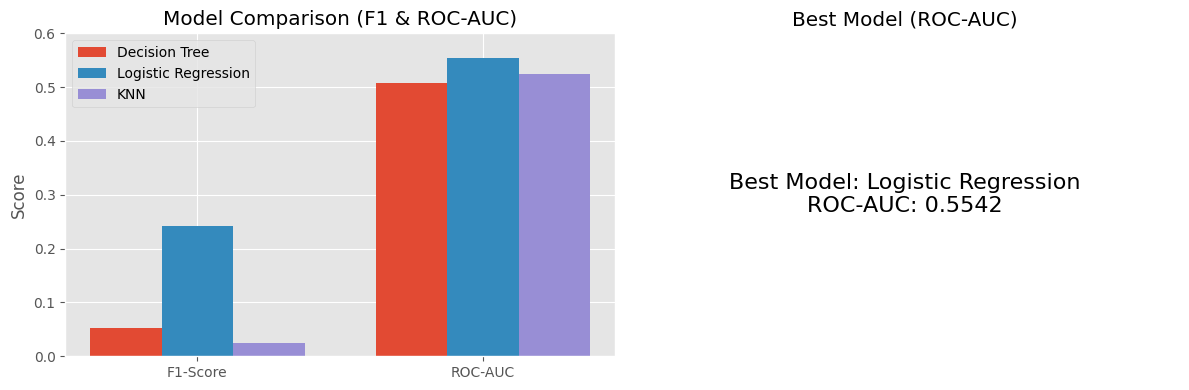

In [ ]:
results_df = pd.DataFrame({
    'Model': ['Decision Tree', 'Logistic Regression', 'KNN'],
    'F1-Score': [dtl_f1, lr_f1, knn_f1],
    'ROC-AUC': [dtl_auc, lr_auc, knn_auc]
})

print("Model Comparison (F1-Score & ROC-AUC):")
print(results_df.to_string(index=False))

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

metrics = ['F1-Score', 'ROC-AUC']
x = np.arange(len(metrics))
width = 0.25

ax1 = axes[0]
ax1.bar(x - width, results_df.iloc[0, 1:].values, width, label='Decision Tree')
ax1.bar(x, results_df.iloc[1, 1:].values, width, label='Logistic Regression')
ax1.bar(x + width, results_df.iloc[2, 1:].values, width, label='KNN')

ax1.set_ylabel('Score')
ax1.set_title('Model Comparison (F1 & ROC-AUC)')
ax1.set_xticks(x)
ax1.set_xticklabels(metrics)
ax1.set_ylim(0, 0.6)
ax1.legend()

ax2 = axes[1]
best_model_idx = results_df['ROC-AUC'].idxmax()
best_model = results_df.loc[best_model_idx, 'Model']
best_auc = results_df.loc[best_model_idx, 'ROC-AUC']

ax2.text(
    0.5, 0.5,
    f"Best Model: {best_model}\nROC-AUC: {best_auc:.4f}",
    ha='center', va='center', fontsize=16, transform=ax2.transAxes
)
ax2.set_title('Best Model (ROC-AUC)')
ax2.axis('off')

plt.tight_layout()
plt.show()

### Comparison with Scikit-Learn Decision Tree
Comparing from-scratch implementation with scikit-learn:
- **ID3**: DecisionTreeClassifier with criterion='entropy'
- **C4.5**: DecisionTreeClassifier with criterion='entropy' + ccp_alpha (pruning)
- **CART**: DecisionTreeClassifier with criterion='gini'

COMPARISON: From-Scratch vs Scikit-Learn Decision Trees

Training ID3 (entropy)...

Training C4.5 (entropy+pruning)...

Training CART (gini)...

RESULTS COMPARISON

Decision Tree Comparison (From-Scratch vs Scikit-Learn):
            Model  Accuracy  Precision   Recall  F1-Score  ROC-AUC
From-Scratch CART     0.853   0.285714 0.028369  0.051613 0.508364
      Sklearn ID3     0.741   0.156977 0.191489  0.172524 0.511344
     Sklearn C4.5     0.741   0.156977 0.191489  0.172524 0.511344
     Sklearn CART     0.730   0.151351 0.198582  0.171779 0.507905


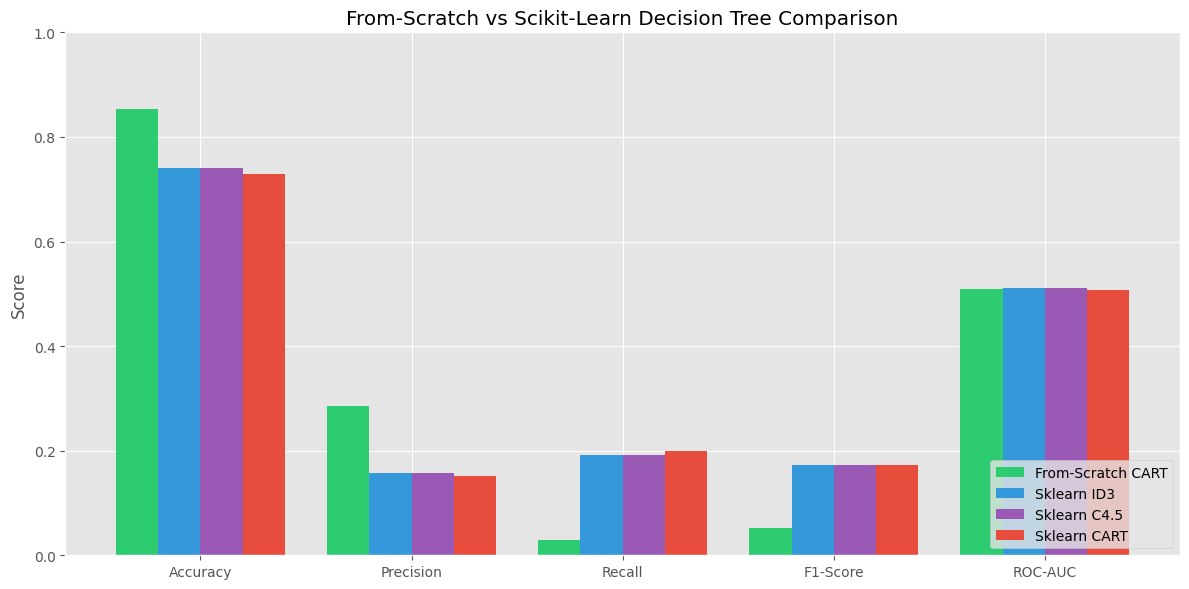

In [104]:
from sklearn.tree import DecisionTreeClassifier

print("COMPARISON: From-Scratch vs Scikit-Learn Decision Trees")

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

sklearn_models = {
    'ID3 (entropy)': DecisionTreeClassifier(criterion='entropy', random_state=42),
    'C4.5 (entropy+pruning)': DecisionTreeClassifier(criterion='entropy', ccp_alpha=0.001, random_state=42),
    'CART (gini)': DecisionTreeClassifier(criterion='gini', random_state=42)
}

sklearn_results = {}

for model_name, model in sklearn_models.items():
    print(f"\nTraining {model_name}...")
    
    oof_preds = np.zeros(len(X_small))
    test_preds = np.zeros(len(X_test))
    
    for fold, (train_idx, val_idx) in enumerate(skf.split(X_small, y_small)):
        X_tr, y_tr = X_small[train_idx], y_small[train_idx]
        X_val, y_val = X_small[val_idx], y_small[val_idx]
        
        model_clone = DecisionTreeClassifier(
            criterion=model.criterion,
            ccp_alpha=model.ccp_alpha,
            random_state=42
        )
        model_clone.fit(X_tr, y_tr)
        
        oof_preds[val_idx] = model_clone.predict_proba(X_val)[:, 1]
        test_preds += model_clone.predict_proba(X_test)[:, 1] / 5
    
    oof_binary = (oof_preds >= 0.5).astype(int)
    
    sklearn_results[model_name] = {
        'Accuracy': accuracy_score(y_small, oof_binary),
        'Precision': precision_score(y_small, oof_binary),
        'Recall': recall_score(y_small, oof_binary),
        'F1-Score': f1_score(y_small, oof_binary),
        'ROC-AUC': roc_auc_score(y_small, oof_preds)
    }

print("\n" + "=" * 60)
print("RESULTS COMPARISON")
print("=" * 60)

comparison_data = {
    'Model': ['From-Scratch CART', 'Sklearn ID3', 'Sklearn C4.5', 'Sklearn CART'],
    'Accuracy': [dtl_acc, sklearn_results['ID3 (entropy)']['Accuracy'], 
                 sklearn_results['C4.5 (entropy+pruning)']['Accuracy'],
                 sklearn_results['CART (gini)']['Accuracy']],
    'Precision': [dtl_prec, sklearn_results['ID3 (entropy)']['Precision'],
                  sklearn_results['C4.5 (entropy+pruning)']['Precision'],
                  sklearn_results['CART (gini)']['Precision']],
    'Recall': [dtl_rec, sklearn_results['ID3 (entropy)']['Recall'],
               sklearn_results['C4.5 (entropy+pruning)']['Recall'],
               sklearn_results['CART (gini)']['Recall']],
    'F1-Score': [dtl_f1, sklearn_results['ID3 (entropy)']['F1-Score'],
                 sklearn_results['C4.5 (entropy+pruning)']['F1-Score'],
                 sklearn_results['CART (gini)']['F1-Score']],
    'ROC-AUC': [dtl_auc, sklearn_results['ID3 (entropy)']['ROC-AUC'],
                sklearn_results['C4.5 (entropy+pruning)']['ROC-AUC'],
                sklearn_results['CART (gini)']['ROC-AUC']]
}

comparison_df = pd.DataFrame(comparison_data)
print("\nDecision Tree Comparison (From-Scratch vs Scikit-Learn):")
print(comparison_df.to_string(index=False))

fig, ax = plt.subplots(figsize=(12, 6))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
x = np.arange(len(metrics))
width = 0.2

colors = ['#2ecc71', '#3498db', '#9b59b6', '#e74c3c']
for i, model in enumerate(comparison_df['Model']):
    values = comparison_df.iloc[i, 1:].values
    ax.bar(x + i * width, values, width, label=model, color=colors[i])

ax.set_ylabel('Score')
ax.set_title('From-Scratch vs Scikit-Learn Decision Tree Comparison')
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(metrics)
ax.legend(loc='lower right')
ax.set_ylim(0, 1)
plt.tight_layout()
plt.show()

COMPARISON: From-Scratch vs Scikit-Learn Logistic Regression

Training LogReg (L2)...

Training LogReg (L1)...


C:\Users\Persada\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1160: UserWarning: Inconsistent values: penalty=l1 with l1_ratio=0.0. penalty is deprecated. Please use l1_ratio only.
  warnings.warn(
C:\Users\Persada\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1160: UserWarning: Inconsistent values: penalty=l1 with l1_ratio=0.0. penalty is deprecated. Please use l1_ratio only.
  warnings.warn(
C:\Users\Persada\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1160: UserWarning: Inconsistent values: penalty=l1 with l1_ratio=0.0. penalty is deprecated. Please use l1_ratio only.
  warnings.warn(
C:\Users\Persada\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1160: UserWarning: Inconsistent values: penalty=l1 with l1_ratio=0.0. penalty is deprecated. Please use l1_ratio only.
  warnings.warn(
C:\Users\Persada\AppData\Roaming\Python\Python313\site-packages\


Training LogReg (ElasticNet)...

RESULTS COMPARISON

Logistic Regression Comparison (From-Scratch vs Scikit-Learn):
                           Model  Accuracy  Precision   Recall  F1-Score  ROC-AUC
From-Scratch Logistic Regression     0.619   0.168508 0.432624  0.242545 0.554191
             Sklearn LogReg (L2)     0.835   0.260000 0.092199  0.136126 0.555660
             Sklearn LogReg (L1)     0.845   0.305556 0.078014  0.124294 0.564082
     Sklearn LogReg (ElasticNet)     0.843   0.309524 0.092199  0.142077 0.559871


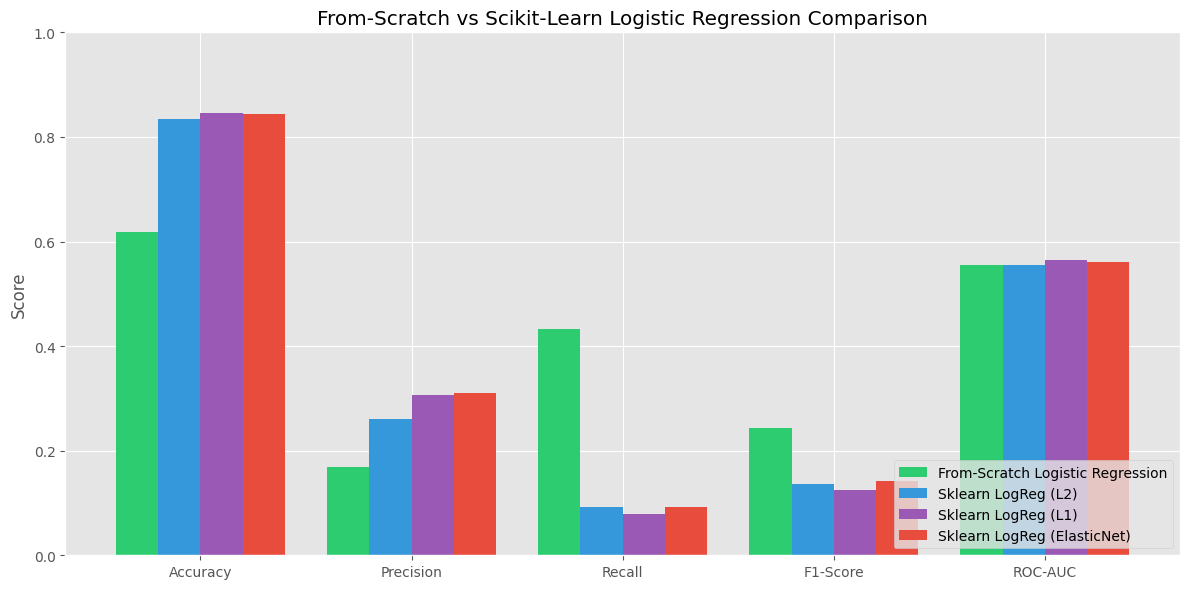

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score
)

print("COMPARISON: From-Scratch vs Scikit-Learn Logistic Regression")

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

sklearn_models = {
    'LogReg (L2)': LogisticRegression(
        penalty='l2',
        solver='lbfgs',
        max_iter=1000,
        random_state=42
    ),
    'LogReg (L1)': LogisticRegression(
        penalty='l1',
        solver='liblinear',
        max_iter=1000,
        random_state=42
    ),
    'LogReg (ElasticNet)': LogisticRegression(
        penalty='elasticnet',
        l1_ratio=0.5,
        solver='saga',
        max_iter=2000,
        random_state=42
    )
}

sklearn_results = {}

for model_name, model in sklearn_models.items():
    print(f"\nTraining {model_name}...")

    oof_preds = np.zeros(len(X_small))
    test_preds = np.zeros(len(X_test))

    for fold, (train_idx, val_idx) in enumerate(skf.split(X_small, y_small)):
        X_tr, y_tr = X_small[train_idx], y_small[train_idx]
        X_val, y_val = X_small[val_idx], y_small[val_idx]

        model_clone = LogisticRegression(**model.get_params())
        model_clone.fit(X_tr, y_tr)

        oof_preds[val_idx] = model_clone.predict_proba(X_val)[:, 1]
        test_preds += model_clone.predict_proba(X_test)[:, 1] / skf.n_splits

    oof_binary = (oof_preds >= 0.5).astype(int)

    sklearn_results[model_name] = {
        'Accuracy': accuracy_score(y_small, oof_binary),
        'Precision': precision_score(y_small, oof_binary),
        'Recall': recall_score(y_small, oof_binary),
        'F1-Score': f1_score(y_small, oof_binary),
        'ROC-AUC': roc_auc_score(y_small, oof_preds)
    }

print("\n" + "=" * 60)
print("RESULTS COMPARISON")
print("=" * 60)

comparison_data = {
    'Model': [
        'From-Scratch Logistic Regression',
        'Sklearn LogReg (L2)',
        'Sklearn LogReg (L1)',
        'Sklearn LogReg (ElasticNet)'
    ],
    'Accuracy': [
        lr_acc,
        sklearn_results['LogReg (L2)']['Accuracy'],
        sklearn_results['LogReg (L1)']['Accuracy'],
        sklearn_results['LogReg (ElasticNet)']['Accuracy']
    ],
    'Precision': [
        lr_prec,
        sklearn_results['LogReg (L2)']['Precision'],
        sklearn_results['LogReg (L1)']['Precision'],
        sklearn_results['LogReg (ElasticNet)']['Precision']
    ],
    'Recall': [
        lr_rec,
        sklearn_results['LogReg (L2)']['Recall'],
        sklearn_results['LogReg (L1)']['Recall'],
        sklearn_results['LogReg (ElasticNet)']['Recall']
    ],
    'F1-Score': [
        lr_f1,
        sklearn_results['LogReg (L2)']['F1-Score'],
        sklearn_results['LogReg (L1)']['F1-Score'],
        sklearn_results['LogReg (ElasticNet)']['F1-Score']
    ],
    'ROC-AUC': [
        lr_auc,
        sklearn_results['LogReg (L2)']['ROC-AUC'],
        sklearn_results['LogReg (L1)']['ROC-AUC'],
        sklearn_results['LogReg (ElasticNet)']['ROC-AUC']
    ]
}

comparison_df = pd.DataFrame(comparison_data)

print("\nLogistic Regression Comparison (From-Scratch vs Scikit-Learn):")
print(comparison_df.to_string(index=False))

fig, ax = plt.subplots(figsize=(12, 6))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
x = np.arange(len(metrics))
width = 0.2

colors = ['#2ecc71', '#3498db', '#9b59b6', '#e74c3c']

for i, model in enumerate(comparison_df['Model']):
    values = comparison_df.iloc[i, 1:].values
    ax.bar(x + i * width, values, width, label=model, color=colors[i])

ax.set_ylabel('Score')
ax.set_title('From-Scratch vs Scikit-Learn Logistic Regression Comparison')
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(metrics)
ax.legend(loc='lower right')
ax.set_ylim(0, 1)
plt.tight_layout()
plt.show()

COMPARISON: From-Scratch vs Scikit-Learn KNN

Training KNN (k=3)...

Training KNN (k=5)...

Training KNN (k=11)...

RESULTS COMPARISON

KNN Comparison (From-Scratch vs Scikit-Learn):
             Model  Accuracy  Precision   Recall  F1-Score  ROC-AUC
  From-Scratch KNN     0.847   0.125000 0.014184  0.025478 0.523981
 Sklearn KNN (k=3)     0.824   0.142857 0.049645  0.073684 0.533591
 Sklearn KNN (k=5)     0.847   0.125000 0.014184  0.025478 0.516888
Sklearn KNN (k=11)     0.859   0.000000 0.000000  0.000000 0.527634


C:\Users\Persada\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


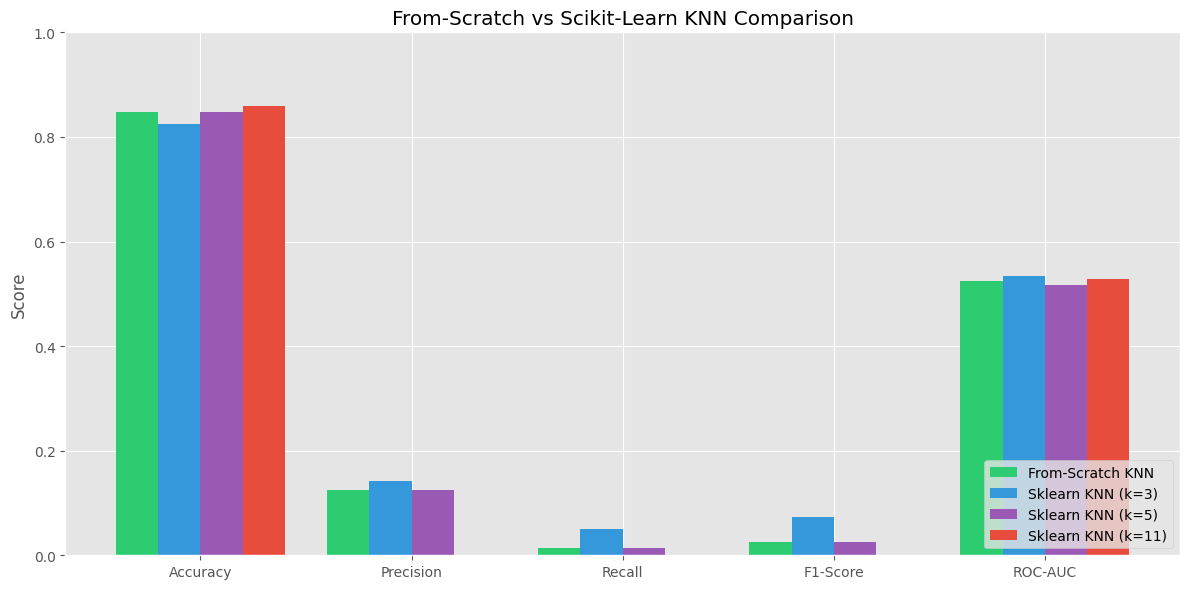

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score
)

print("COMPARISON: From-Scratch vs Scikit-Learn KNN")

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

sklearn_models = {
    'KNN (k=3)': KNeighborsClassifier(n_neighbors=3),
    'KNN (k=5)': KNeighborsClassifier(n_neighbors=5),
    'KNN (k=11)': KNeighborsClassifier(n_neighbors=11)
}

sklearn_results = {}

for model_name, model in sklearn_models.items():
    print(f"\nTraining {model_name}...")

    oof_preds = np.zeros(len(X_small))
    test_preds = np.zeros(len(X_test))

    for fold, (train_idx, val_idx) in enumerate(skf.split(X_small, y_small)):
        X_tr, y_tr = X_small[train_idx], y_small[train_idx]
        X_val, y_val = X_small[val_idx], y_small[val_idx]

        model_clone = KNeighborsClassifier(**model.get_params())
        model_clone.fit(X_tr, y_tr)

        oof_preds[val_idx] = model_clone.predict_proba(X_val)[:, 1]
        test_preds += model_clone.predict_proba(X_test)[:, 1] / skf.n_splits

    oof_binary = (oof_preds >= 0.5).astype(int)

    sklearn_results[model_name] = {
        'Accuracy': accuracy_score(y_small, oof_binary),
        'Precision': precision_score(y_small, oof_binary),
        'Recall': recall_score(y_small, oof_binary),
        'F1-Score': f1_score(y_small, oof_binary),
        'ROC-AUC': roc_auc_score(y_small, oof_preds)
    }

print("\n" + "=" * 60)
print("RESULTS COMPARISON")
print("=" * 60)

comparison_data = {
    'Model': [
        'From-Scratch KNN',
        'Sklearn KNN (k=3)',
        'Sklearn KNN (k=5)',
        'Sklearn KNN (k=11)'
    ],
    'Accuracy': [
        knn_acc,
        sklearn_results['KNN (k=3)']['Accuracy'],
        sklearn_results['KNN (k=5)']['Accuracy'],
        sklearn_results['KNN (k=11)']['Accuracy']
    ],
    'Precision': [
        knn_prec,
        sklearn_results['KNN (k=3)']['Precision'],
        sklearn_results['KNN (k=5)']['Precision'],
        sklearn_results['KNN (k=11)']['Precision']
    ],
    'Recall': [
        knn_rec,
        sklearn_results['KNN (k=3)']['Recall'],
        sklearn_results['KNN (k=5)']['Recall'],
        sklearn_results['KNN (k=11)']['Recall']
    ],
    'F1-Score': [
        knn_f1,
        sklearn_results['KNN (k=3)']['F1-Score'],
        sklearn_results['KNN (k=5)']['F1-Score'],
        sklearn_results['KNN (k=11)']['F1-Score']
    ],
    'ROC-AUC': [
        knn_auc,
        sklearn_results['KNN (k=3)']['ROC-AUC'],
        sklearn_results['KNN (k=5)']['ROC-AUC'],
        sklearn_results['KNN (k=11)']['ROC-AUC']
    ]
}

comparison_df = pd.DataFrame(comparison_data)

print("\nKNN Comparison (From-Scratch vs Scikit-Learn):")
print(comparison_df.to_string(index=False))

fig, ax = plt.subplots(figsize=(12, 6))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
x = np.arange(len(metrics))
width = 0.2

colors = ['#2ecc71', '#3498db', '#9b59b6', '#e74c3c']

for i, model in enumerate(comparison_df['Model']):
    values = comparison_df.iloc[i, 1:].values
    ax.bar(x + i * width, values, width, label=model, color=colors[i])

ax.set_ylabel('Score')
ax.set_title('From-Scratch vs Scikit-Learn KNN Comparison')
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(metrics)
ax.legend(loc='lower right')
ax.set_ylim(0, 1)
plt.tight_layout()
plt.show()


### Save and Load Models
Save trained models using pickle for later use.

In [ ]:
import pickle
import os

def save_model_pickle(model, filename):
    with open(filename, 'wb') as f:
        pickle.dump(model, f)
    print(f"Model saved to {filename}")

def load_model_pickle(filename):
    with open(filename, 'rb') as f:
        model = pickle.load(f)
    print(f"Model loaded from {filename}")
    return model

os.makedirs('saved_models', exist_ok=True)

print("Saving models...")

save_model_pickle(dtl, 'saved_models/decision_tree_cart.pkl')
save_model_pickle(lr_model, 'saved_models/logistic_regression.pkl')
save_model_pickle(knn, 'saved_models/knn.pkl')

print("\n" + "=" * 50)
print("Loading models to verify...")
print("=" * 50)

loaded_dtl = load_model_pickle('saved_models/decision_tree_cart.pkl')
loaded_lr = load_model_pickle('saved_models/logistic_regression.pkl')
loaded_knn = load_model_pickle('saved_models/knn.pkl')

print("\nVerifying loaded models with sample prediction...")
sample_X = X_test_df.iloc[:100]


print(f"DTL predictions: {loaded_dtl.predict(sample_X)}")
print(f"LR predictions: {loaded_lr.predict(sample_X)}")
print(f"KNN predictions: {loaded_knn.predict(sample_X)}")

print("\nAll models saved and loaded successfully!")
print("Saved files in 'saved_models/' folder:")
for f in os.listdir('saved_models'):
    print(f"  - {f}")

Saving models...
Model saved to saved_models/decision_tree_cart.pkl
Model saved to saved_models/logistic_regression.pkl
Model saved to saved_models/knn.pkl

Loading models to verify...
Model loaded from saved_models/decision_tree_cart.pkl
Model loaded from saved_models/logistic_regression.pkl
Model loaded from saved_models/knn.pkl

Verifying loaded models with sample prediction...
   Predicting 100 samples...
   Prediction complete!
DTL predictions: [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
LR predictions: [1 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0]
KNN predictions: [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

## E. Submission
After several iterations, we identified logistic regression as the best-performing model. Because the logistic regression pipeline and preprocessing requirements differ from those of KNN and Decision Tree (CART), we prepared a separate notebook specifically for submission.
The submission implementation can be found in logistic_regression_submission.ipynb

## 6. Error Analysis

### Model Performance Across Classes
1. Most of our model from scratch performance are quite similar to scikit learn implementation in terms of the ROC AUC metrics. For the other like accuracy etc is mostly because we did not implement treshold tuning which could cause huge difference in the comparison
### Best Performing Model
2. The best model between our models is logistic regression. We hypothesize that it's because of the nature of large syntthetic data in which does not resemble real world data patterns. This randomness cause imbalance and instability in non-linear models such as DTL and KNN. However, it is not a big problem for Logistic regression since it does not capture that complex pattern.

### Effect of Feature Scaling
3. Feature scaling help improve our model performance especially on logistic regression since it's a linar model in which is very sensitive to numerical differences
### Handling Missing Data
4. It is better to impute the data on the model. We have tried before on a separate notebook and found that the performance reduced drastically after we dropped it. Imputation with mean works best
### Summary
In conclusion, careful preprocessing choices—such as feature scaling and missing value imputation—play a crucial role in achieving strong model performance. Logistic regression emerges as the most suitable model for this problem, given the characteristics of the dataset, while ROC-AUC remains the most reliable metric for comparing from-scratch and library-based implementations.